In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
pip install "vllm[cuda118]"

In [4]:
pip install pymupdf

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 28.8 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
!pip install accelerate --upgrade

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 8.6 MB/s eta 0:00:00:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
pip install pdfplumber

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 29.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 55.7 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pdfplumber
import pandas as pd
import fitz
def extract_text_pymupdf(pdf_path):
    """Extracts text from a structured (non-scanned) PDF."""
    doc = fitz.open(pdf_path)
    text = "\n".join([page.get_text("text") for page in doc])
    return text

In [2]:
def extract_tables_pdf(pdf_path):
    """Extracts tables from a PDF and converts them into DataFrames."""
    tables = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            table = page.extract_table()
            if table:
                df = pd.DataFrame(table[1:], columns=table[0])  # First row as headers
                tables.append(df)
    return tables

In [37]:
import os
import fitz  # PyMuPDF
from PIL import Image

def extract_embedded_images(pdf_path, save_folder="images"):
    """Extracts embedded images (not full pages) from a PDF and saves them as PNG files."""
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    doc = fitz.open(pdf_path)
    image_paths = []

    for page_index in range(len(doc)):
        page = doc[page_index]
        images = page.get_images(full=True)
        for img_index, img in enumerate(images):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]
            image = Image.open(io.BytesIO(image_bytes))
            filename = f"{save_folder}/page{page_index+1}_img{img_index+1}.{image_ext}"
            image.save(filename)
            image_paths.append(filename)

    return image_paths


In [4]:
import requests
from bs4 import BeautifulSoup

def extract_text_webpage(url):
    """Extracts text from an article webpage."""
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    text = "\n".join([p.get_text(strip=True) for p in soup.find_all("p")])
    return text


In [5]:
def extract_tables_webpage(url):
    """Extracts tables from a webpage and converts them into DataFrames."""
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    tables = []
    for table in soup.find_all("table"):
        rows = []
        for row in table.find_all("tr"):
            cells = [cell.get_text(strip=True) for cell in row.find_all(["td", "th"])]
            rows.append(cells)
        if rows:
            df = pd.DataFrame(rows[1:], columns=rows[0])  # First row as headers
            tables.append(df)
    return tables

In [6]:
def extract_images_webpage(url, save_folder="images"):
    """Extracts images from a webpage and saves them locally."""
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    images = []
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    for i, img in enumerate(soup.find_all("img")):
        img_url = img.get("src")
        if img_url and img_url.startswith(("http", "//")):
            img_url = img_url if img_url.startswith("http") else "https:" + img_url
            try:
                img_data = requests.get(img_url).content
                img_filename = os.path.join(save_folder, f"image_{i+1}.jpg")
                with open(img_filename, "wb") as f:
                    f.write(img_data)
                images.append(img_filename)
            except Exception as e:
                print(f"Failed to download {img_url}: {e}")
    return images

In [7]:
def extract_text(source):
    """Extracts text from PDF or web URL."""
    if source.endswith(".pdf"):
        return extract_text_pymupdf(source)  # Extract from PDF
    elif source.startswith("http"):
        return extract_text_webpage(source)  # Extract from web page
    else:
        raise ValueError("Unsupported file type. Provide a PDF or URL.")


In [8]:
def extract_tables(source):
    """Extracts tables from a PDF or web URL and converts them into DataFrames."""
    if source.endswith(".pdf"):
        return extract_tables_pdf(source)  # Extract from PDF
    elif source.startswith("http"):
        return extract_tables_webpage(source)  # Extract from web page
    else:
        raise ValueError("Unsupported file type. Provide a PDF or URL.")

In [9]:
def extract_images(source, save_folder="images"):
    """Extracts images from PDFs or web pages and saves them locally."""
    if source.endswith(".pdf"):
        return extract_images_pdf(source, save_folder)  # Extract from PDF
    elif source.startswith("http"):
        return extract_images_webpage(source, save_folder)  # Extract from web page
    else:
        raise ValueError("Unsupported file type. Provide a PDF or URL.")

In [10]:
from transformers import pipeline

def extract_all(sources):
    """Extracts text, tables, and images from multiple PDFs and web pages."""
    combined_text = []
    combined_tables = []
    combined_images = []
    source_references = []  # Store source details

    for source in sources:
        text = extract_text(source)
        tables = extract_tables(source)
        images = extract_images(source)

        combined_text.append(text)
        combined_tables.extend(tables)
        combined_images.extend(images)
        source_references.append(source)

    return combined_text, combined_tables, combined_images, source_references

/home/jupyter-wem220/.local/lib/python3.9/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
2025-04-04 01:32:45.200247: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-04 01:32:45.214720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-04 01:32:45.233560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin 

In [31]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import pandas as pd

def generate_lesson_from_extracted_data(sources):
    """
    Generates a lesson from extracted text, tables, and image filenames.
    """

    # Step 1: Extract all content
    all_texts, all_tables, all_images, all_sources = extract_all(sources)

    # Step 2: Convert tables to Markdown
    def table_to_markdown(tables):
        markdown = []
        for df in tables:
            try:
                markdown.append(df.to_markdown(index=False))
            except Exception as e:
                markdown.append(f"*Table rendering failed: {e}*")
        return "\n\n".join(markdown)

    tables_markdown = table_to_markdown(all_tables)

    # Step 3: Combine and truncate extracted text
    combined_text = "\n\n".join(all_texts)[:3000]  # Safe chunk for token limit

    # Step 4: Format image markdown
    image_placeholders = "\n".join([
        f"![image{i+1}]({img})" for i, img in enumerate(all_images)
    ]) if all_images else "*No images extracted.*"

    # Step 5: Prompt assembly
    prompt = f"""
You are an educational content generator. Create a structured lesson based on the text, tables, and images below.

### Text:
{combined_text}

### Tables (Markdown format):
{tables_markdown}

### Images (filenames):
{', '.join(all_images)}

### Instructions:
- Use the provided text to write an engaging lesson with sections and subheadings.
- Include **relevant tables** inline.
- Reference each image **in context** using Markdown syntax like `![image1](images/pdf_page_11.png)` and explain what it shows.
- If you don’t know where an image fits, include it at the end under a section called “📸 Visuals”.

Generate the full lesson below:
"""

    # Step 6: Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf")
    model = AutoModelForCausalLM.from_pretrained(
        "meta-llama/Llama-2-7b-chat-hf",
        device_map="auto",
        torch_dtype=torch.float16
    )

    # Step 7: Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt", truncation=True).input_ids.to(model.device)

    # Step 8: Generate output
    with torch.no_grad():
        output = model.generate(
            input_ids=input_ids,
            max_new_tokens=1024,
            do_sample=True,
            top_k=50,
            top_p=0.95,
            temperature=0.7,
            return_dict_in_generate=True
        )

    generated_ids = output.sequences[0][input_ids.shape[-1]:]
    generated_text = tokenizer.decode(generated_ids, skip_special_tokens=True)

    return generated_text

In [39]:
import re
from IPython.display import Markdown, display

def render_output_with_images_and_tables(lesson: str, images: list, tables: list) -> str:
    """
    Replaces image and table references with actual markdown content for proper rendering.
    """

    rendered = lesson
    used_images = set()

    # Replace image placeholders like ![image1](...) with actual image paths
    for i, img_path in enumerate(images):
        pattern = rf"!\[image{i+1}\]\([^\)]*\)"  # matches ![image1](anything)
        replacement = f"![image{i+1}]({img_path})"
        if re.search(pattern, rendered):
            rendered = re.sub(pattern, replacement, rendered)
            used_images.add(i)

    # Replace [Table X] placeholders with markdown table content
    for i, table_md in enumerate(tables):
        tag = f"[Table {i+1}]"
        if tag in rendered:
            rendered = rendered.replace(tag, f"\n\n{table_md}\n\n")

    # Append any unused images at the end
    unused_images = [i for i in range(len(images)) if i not in used_images]
    if unused_images:
        rendered += "\n\n---\n\n### 📸 Additional Visuals\n"
        for i in unused_images:
            rendered += f"\n![image{i+1}]({images[i]})\n"

    return rendered


In [41]:
from IPython.display import Image, display
import os

def display_images(images):
    for img_path in images:
        if os.path.exists(img_path):
            print(f"📸 {os.path.basename(img_path)}")
            display(Image(filename=img_path))
        else:
            print(f"⚠️ Could not find image: {img_path}")



CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



🎯 Objective:
Understand the key contributions and findings of the paper "UNSUPERVISED REPRESENTATION LEARNING WITH DEEP CONVOLUTIONAL GENERATIVE ADVERSARIAL NETWORKS" by Alec Radford & Luke Metz.

📚 Preparation:

* Read the paper carefully and take notes on the key points.
* Familiarize yourself with the related work and the proposed method.
* Understand the experimental setup and the results presented in the paper.

🎯 Section 1: Introduction

* Summarize the paper's main contribution: deep convolutional generative adversarial networks (DCGANs) for unsupervised representation learning.
* Explain the motivation behind the proposed method: bridging the gap between supervised and unsupervised learning.
* Provide an overview of the paper's structure.

🎯 Section 2: Related Work

* Discuss the existing work on unsupervised representation learning, including the use of autoencoders and generative adversarial networks (GANs).
* Highlight the limitations of these methods and the need for more 

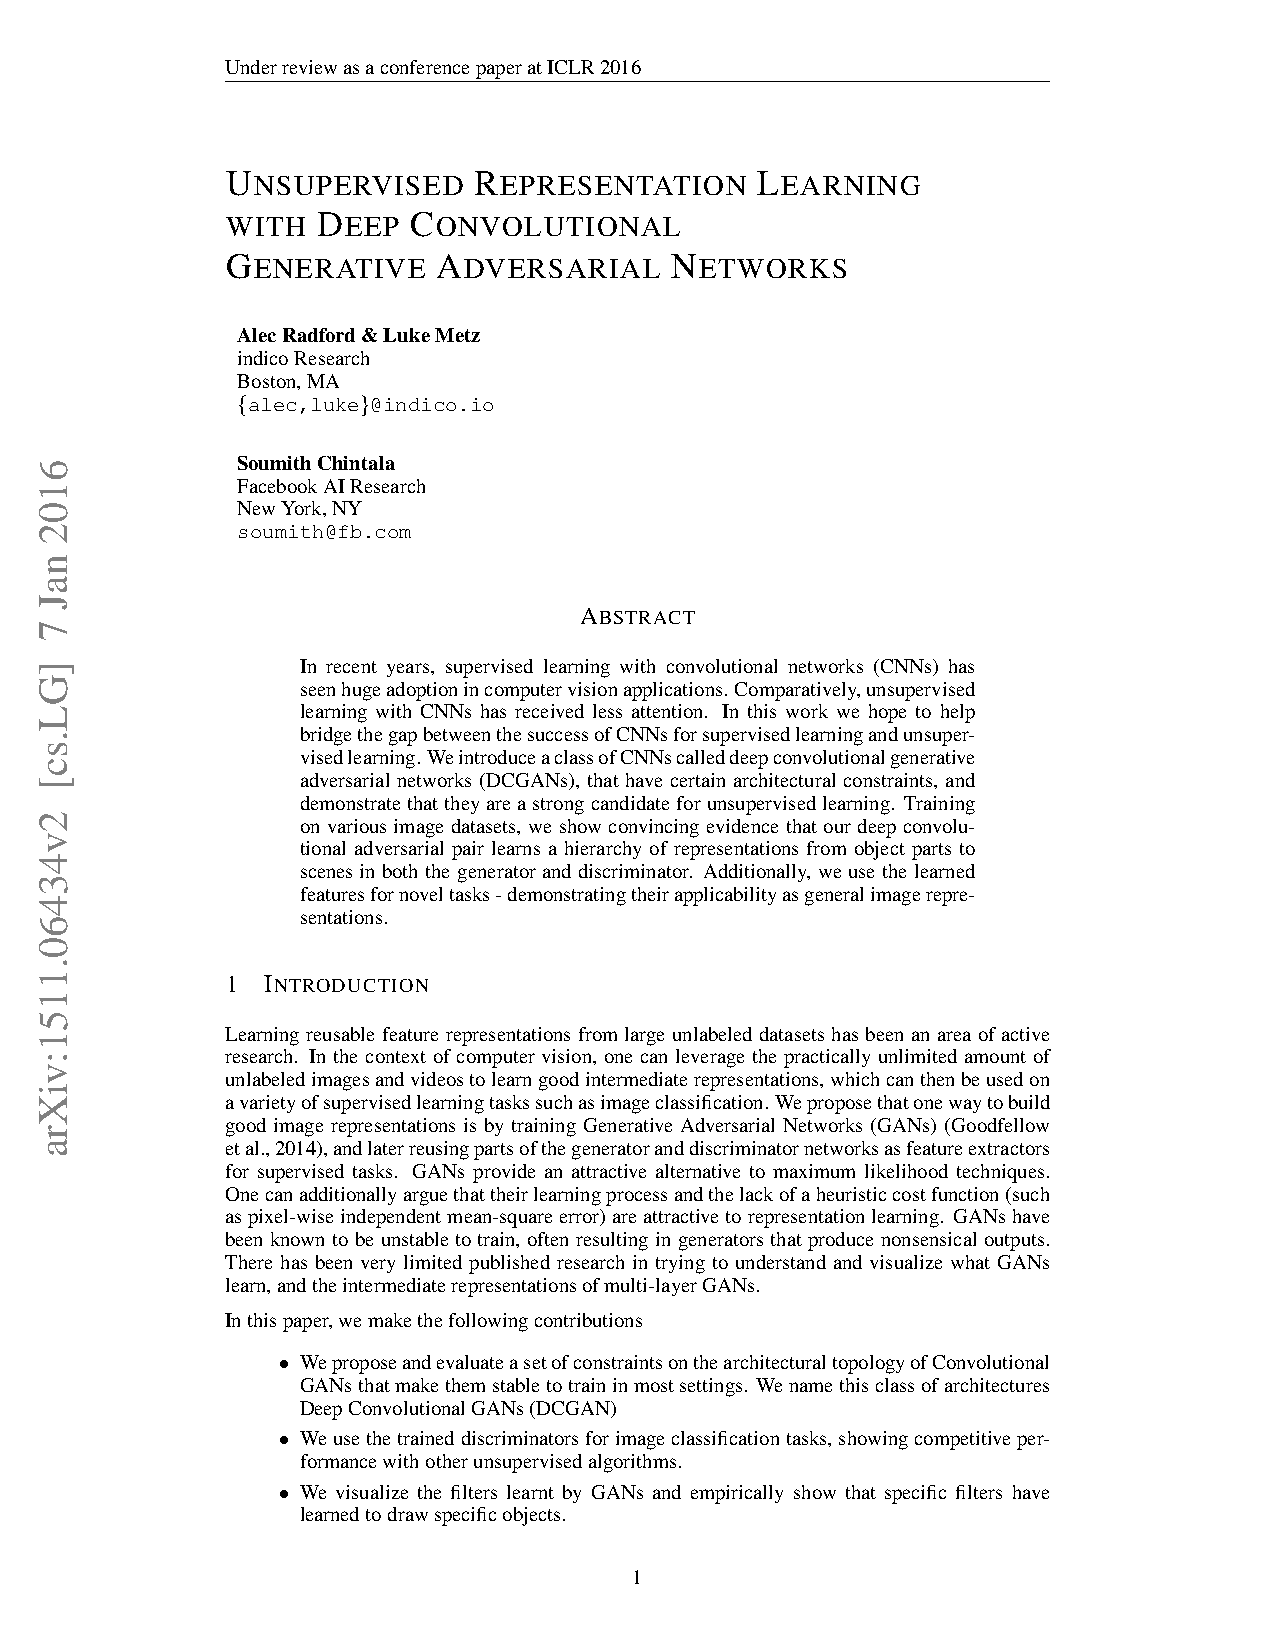

📸 pdf_page_2.png


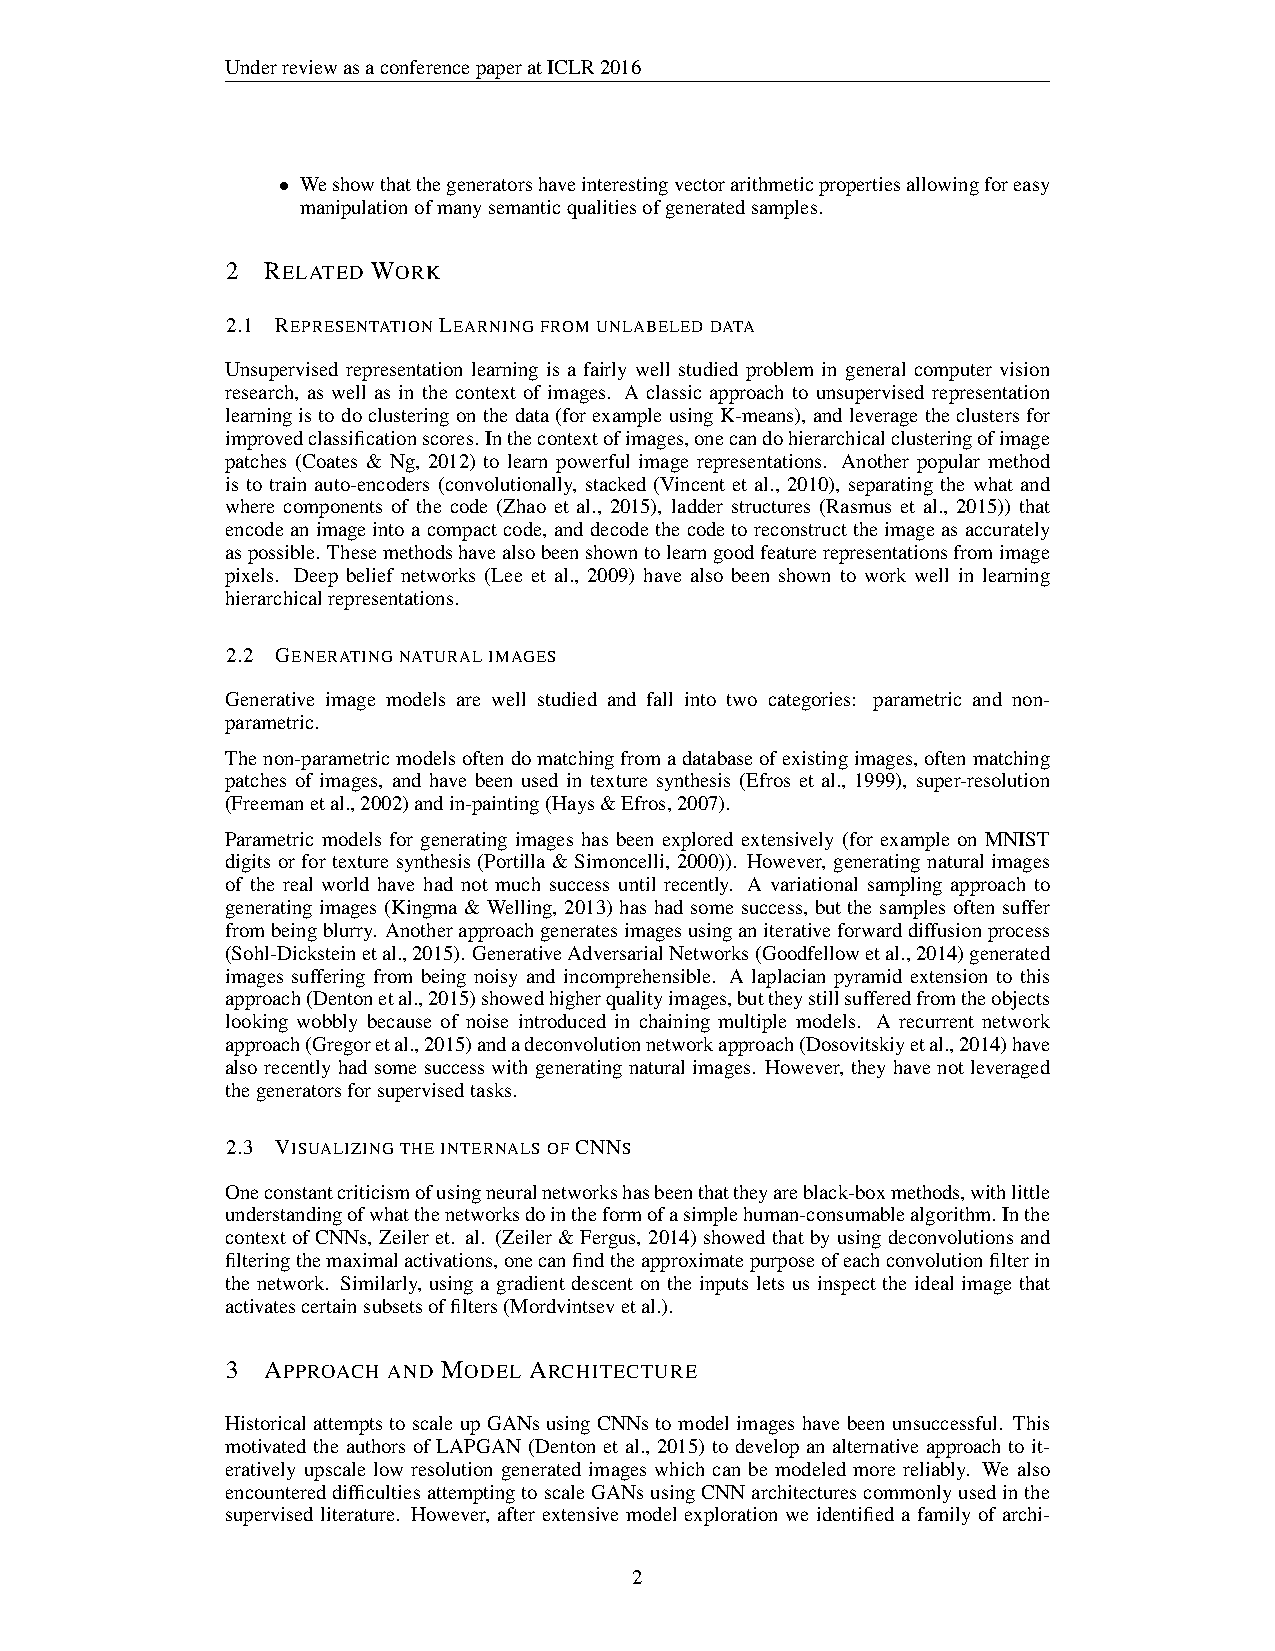

📸 pdf_page_3.png


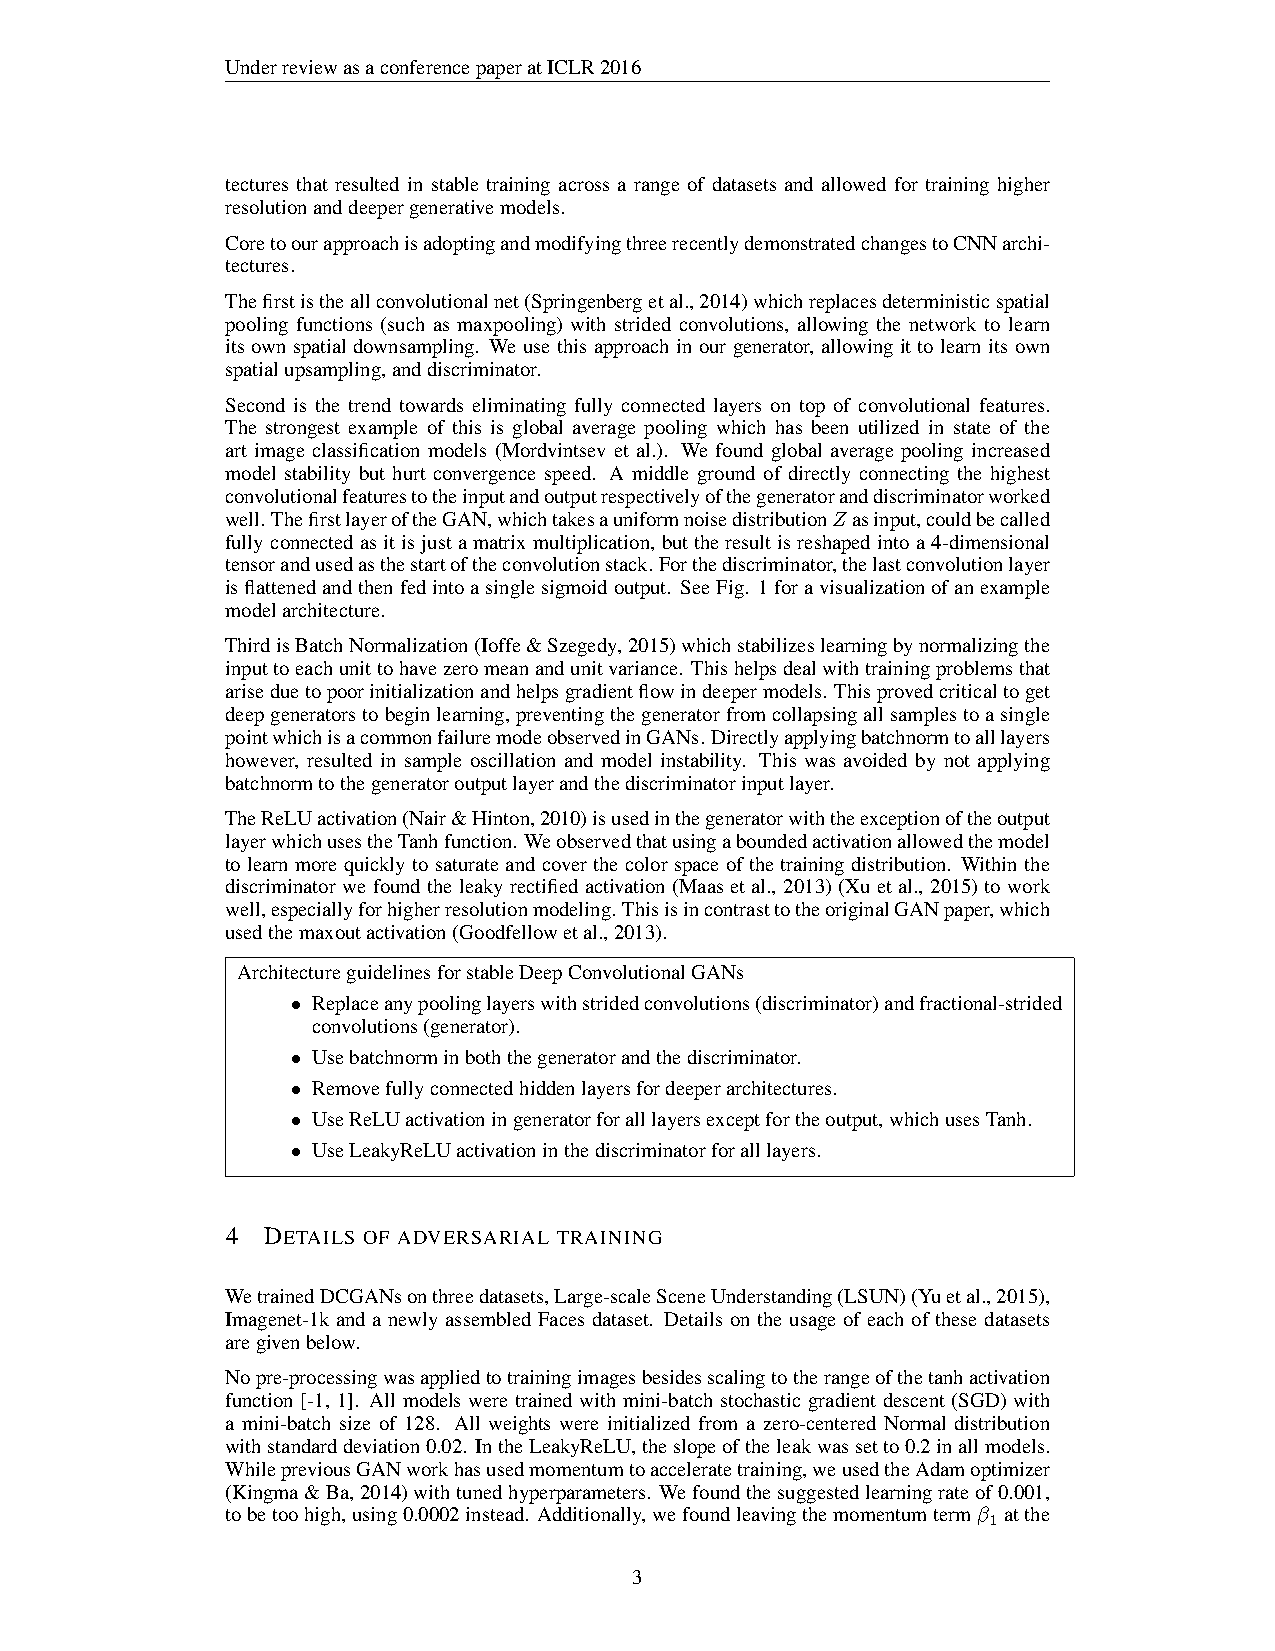

📸 pdf_page_4.png


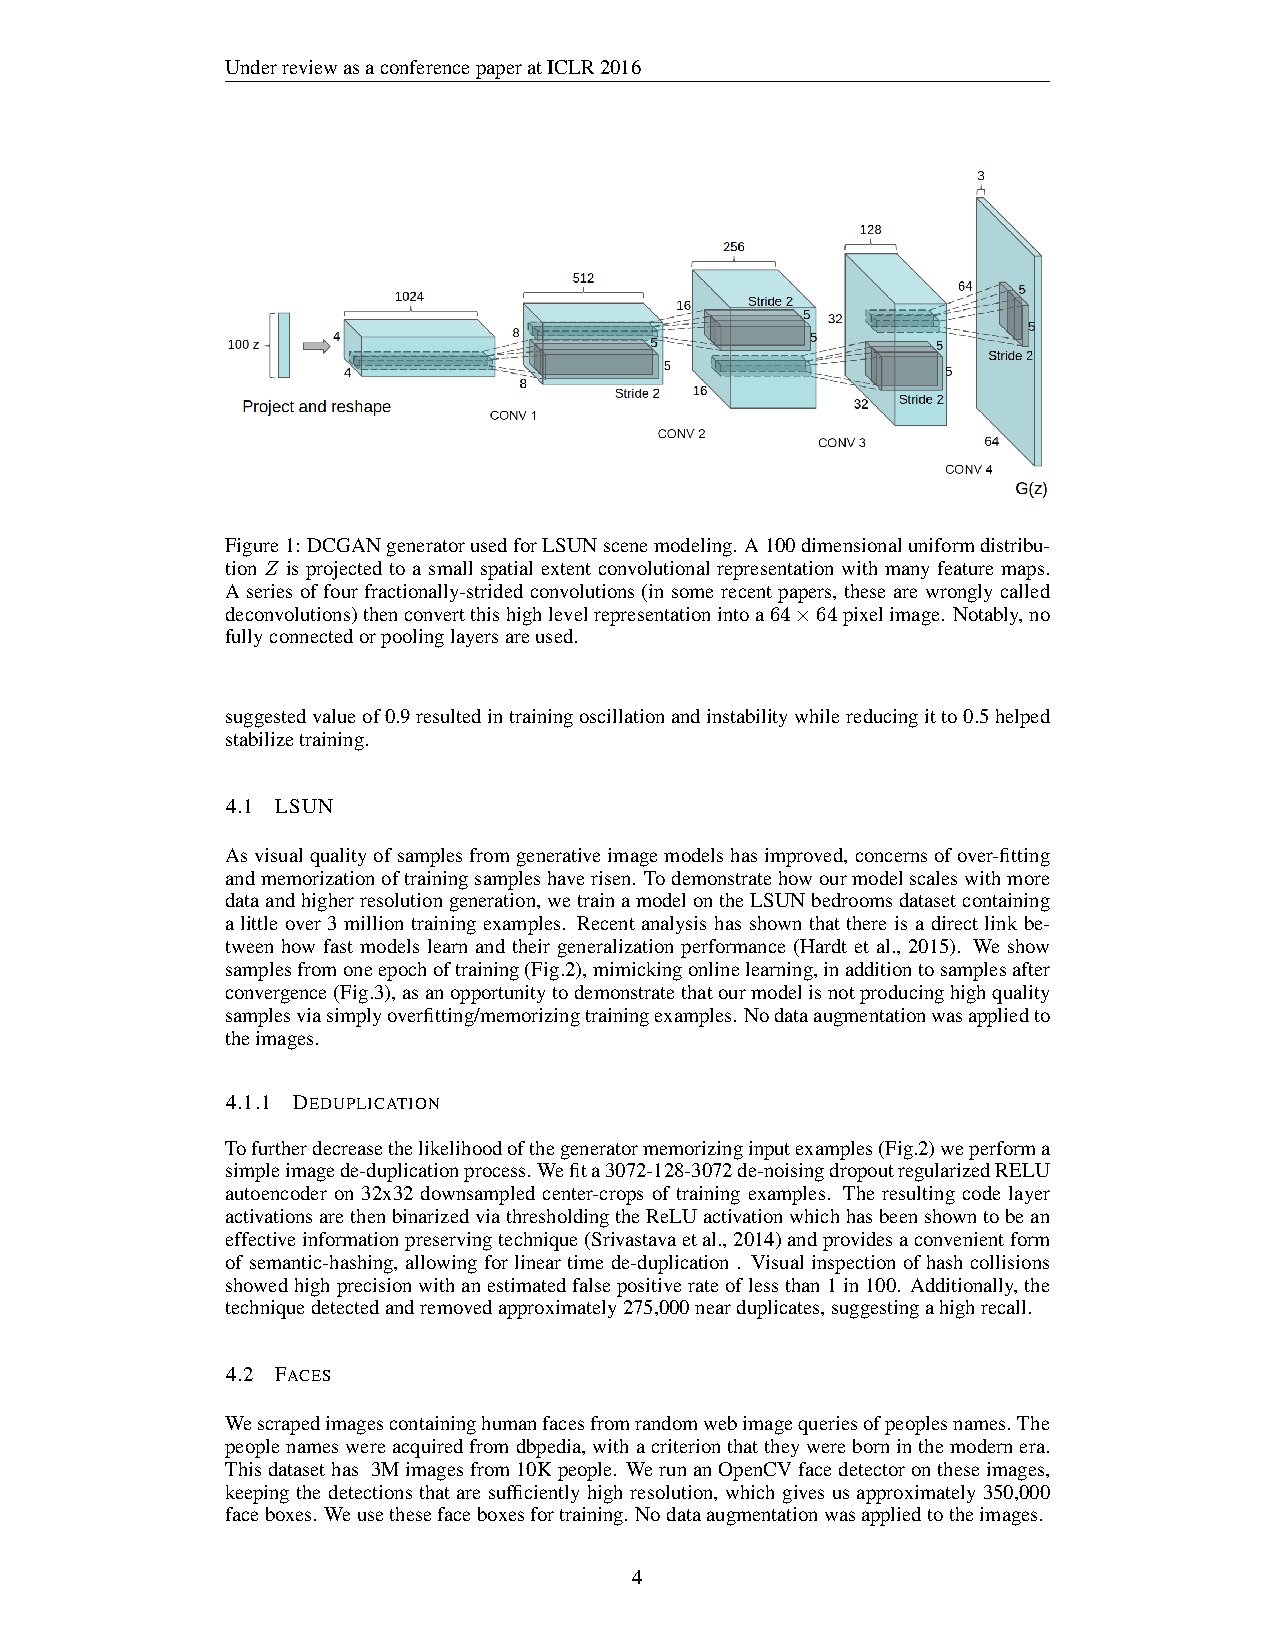

📸 pdf_page_5.png


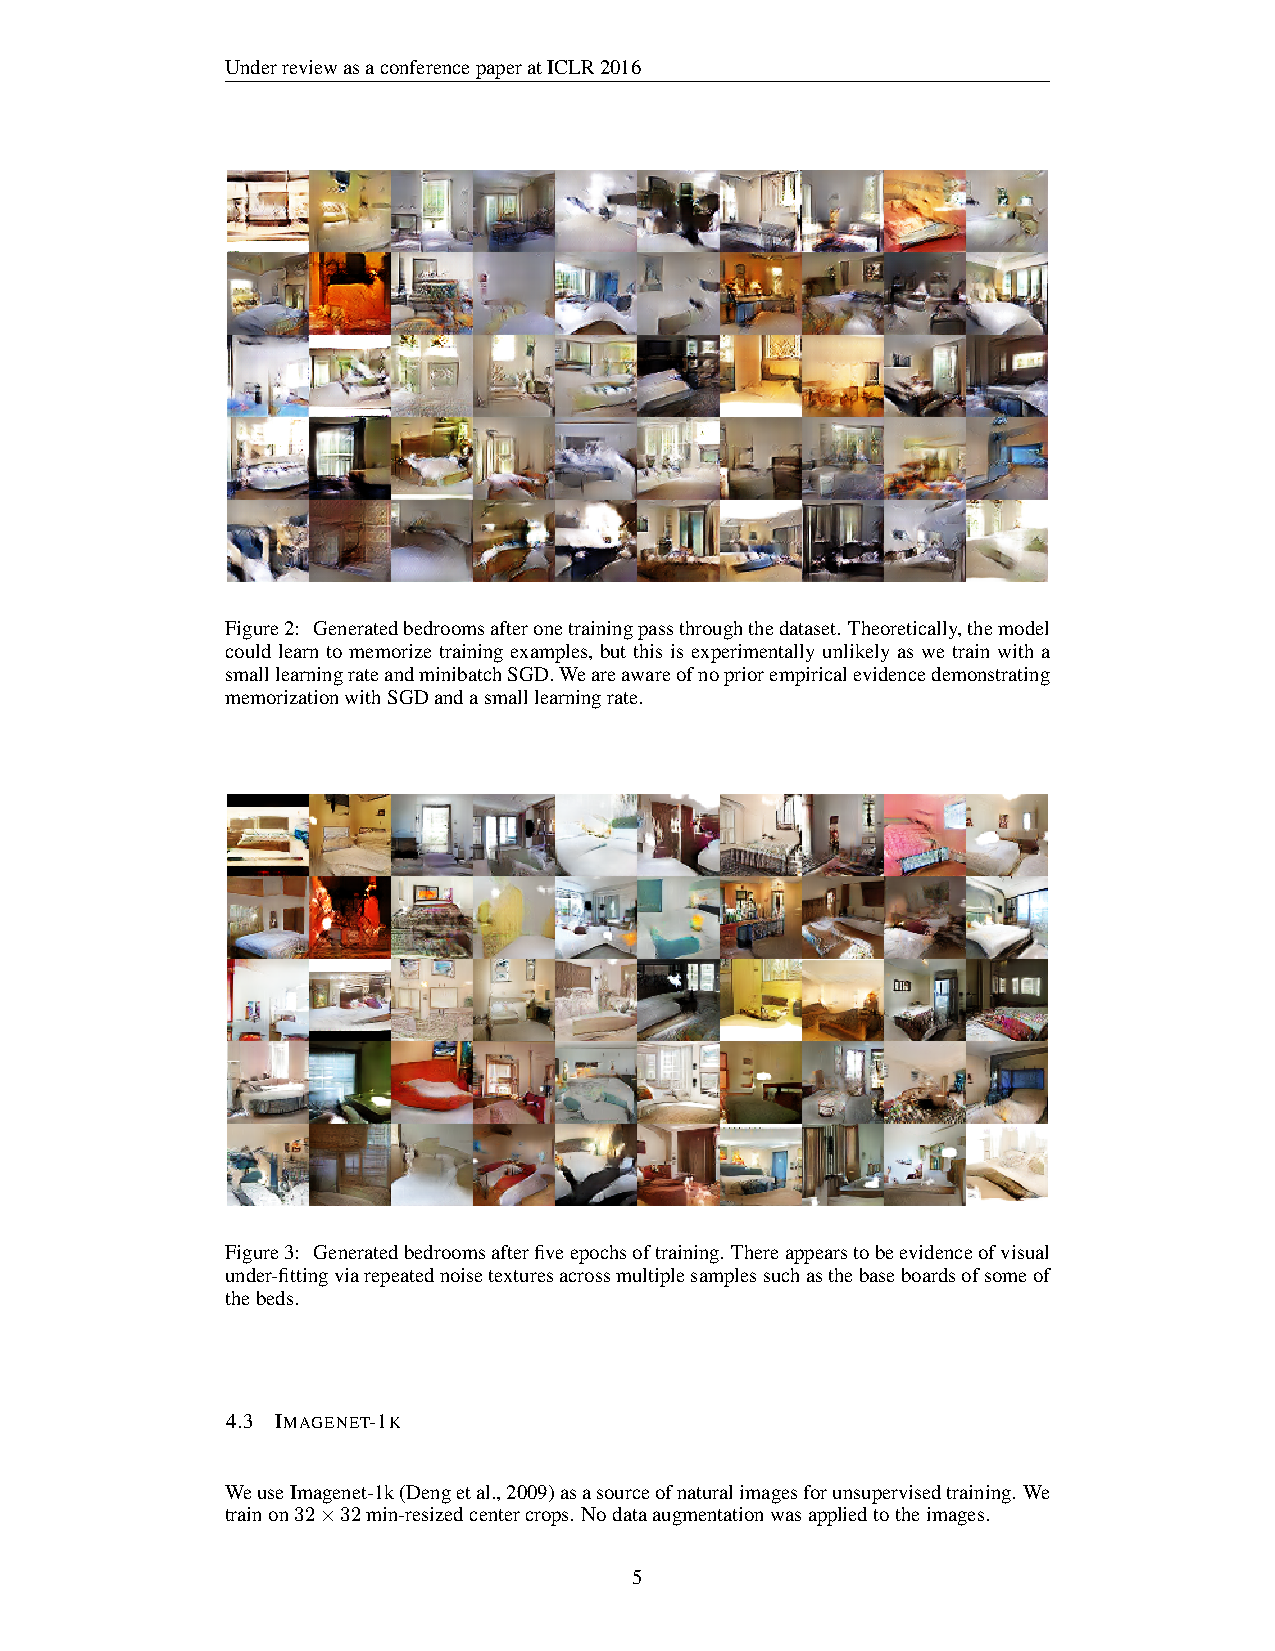

📸 pdf_page_6.png


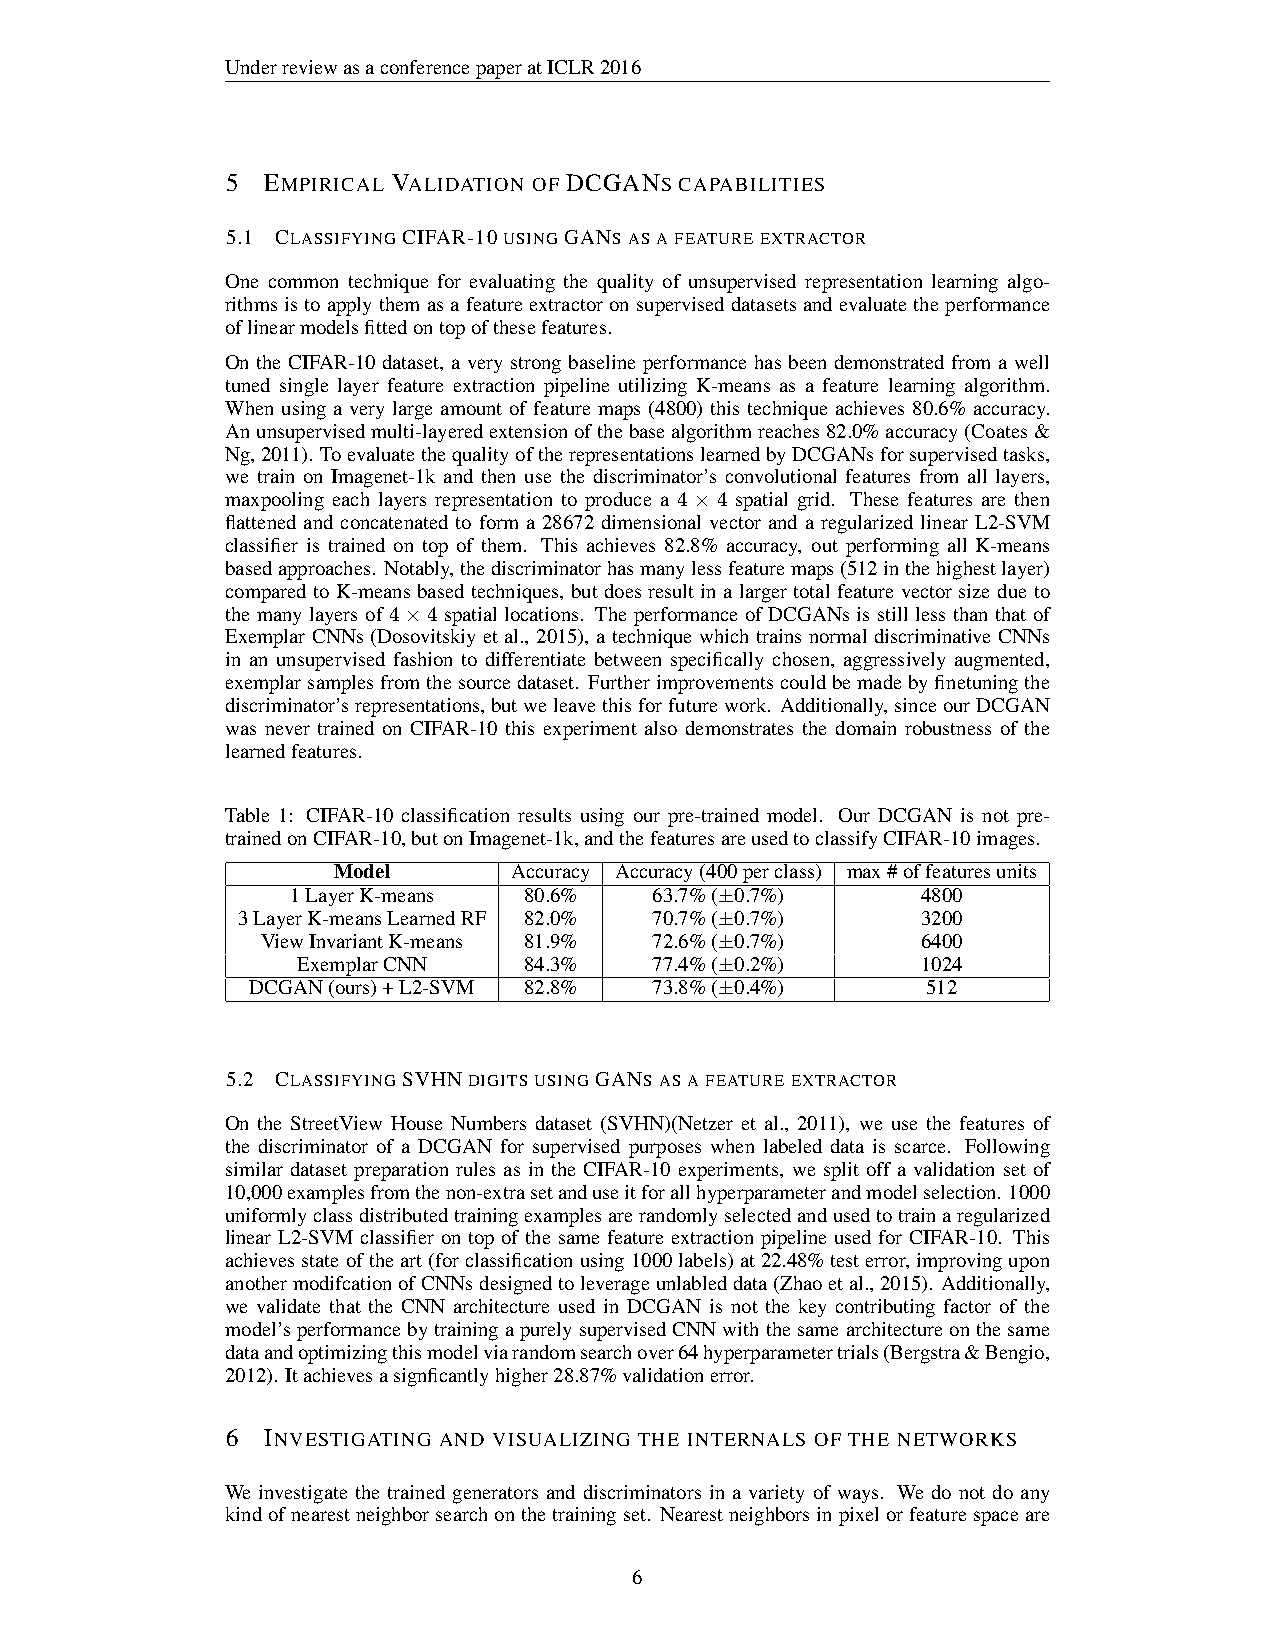

📸 pdf_page_7.png


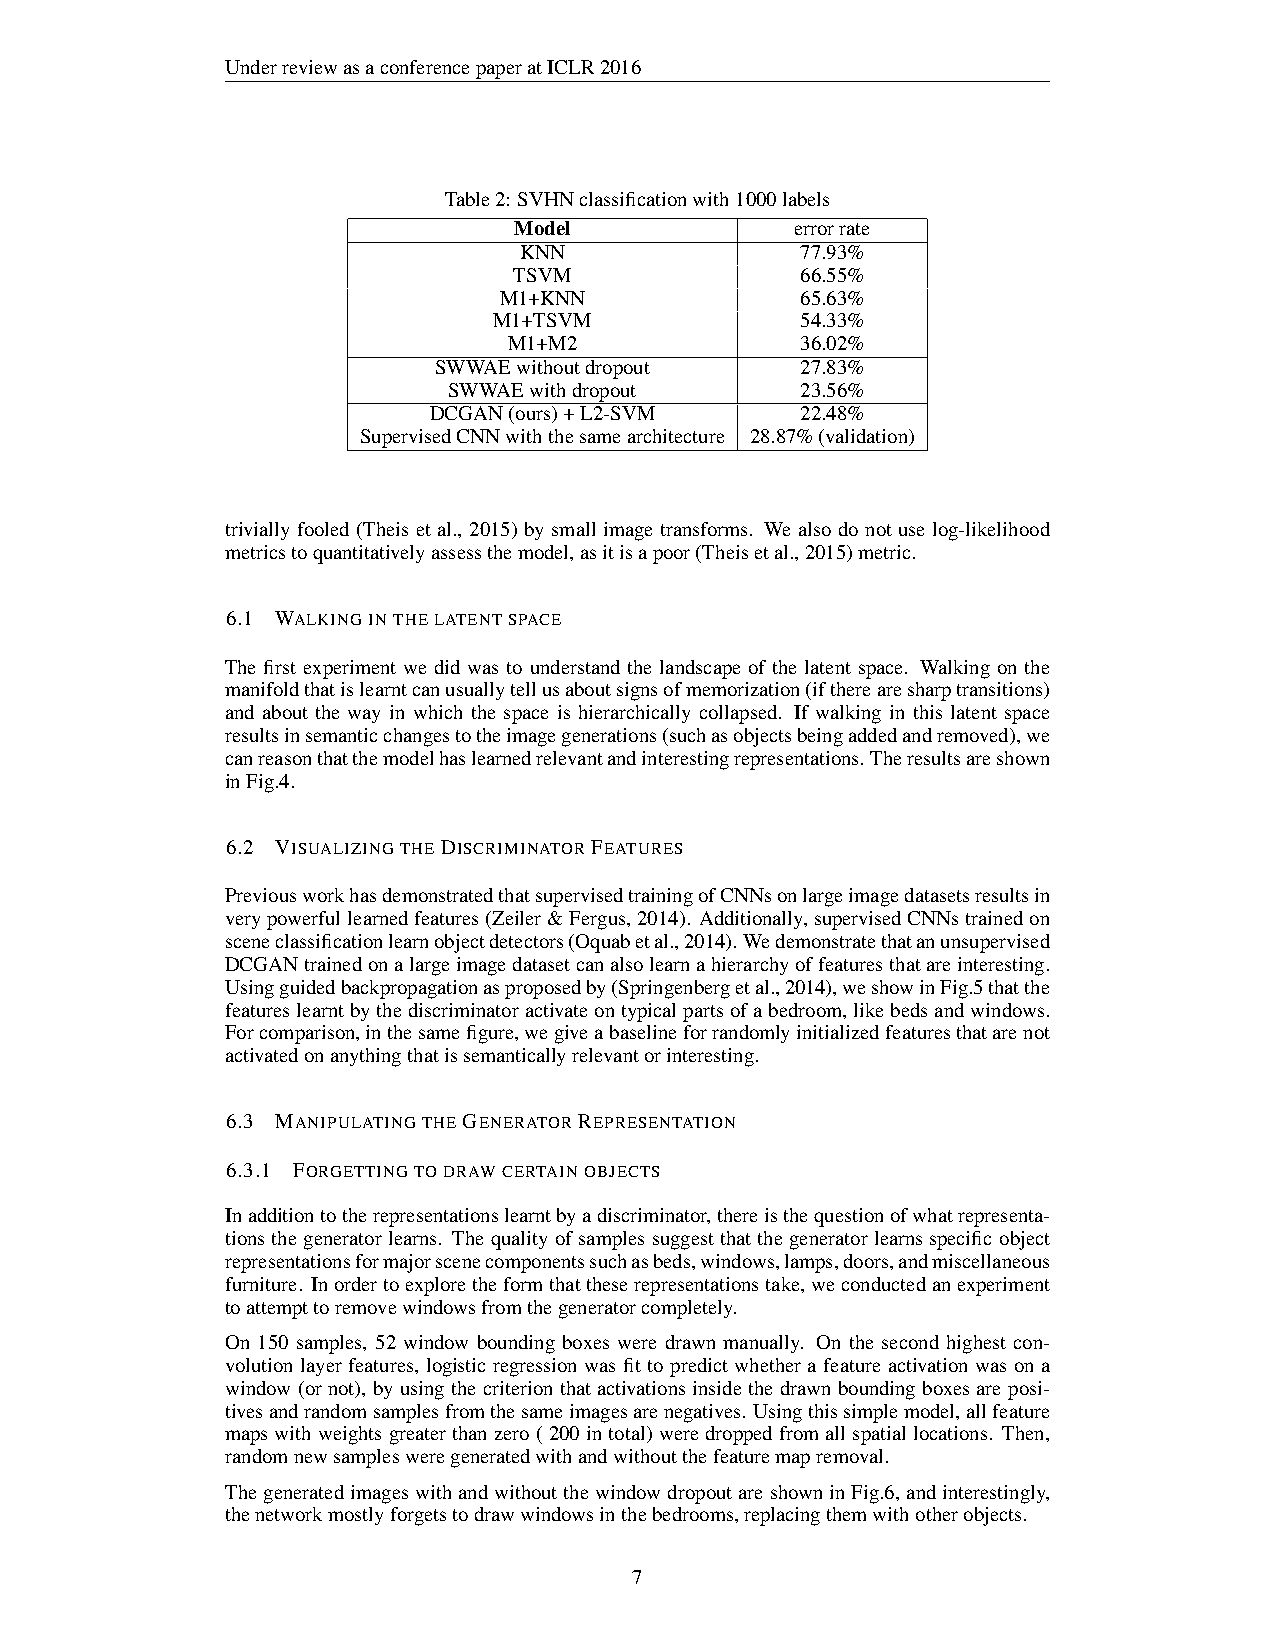

📸 pdf_page_8.png


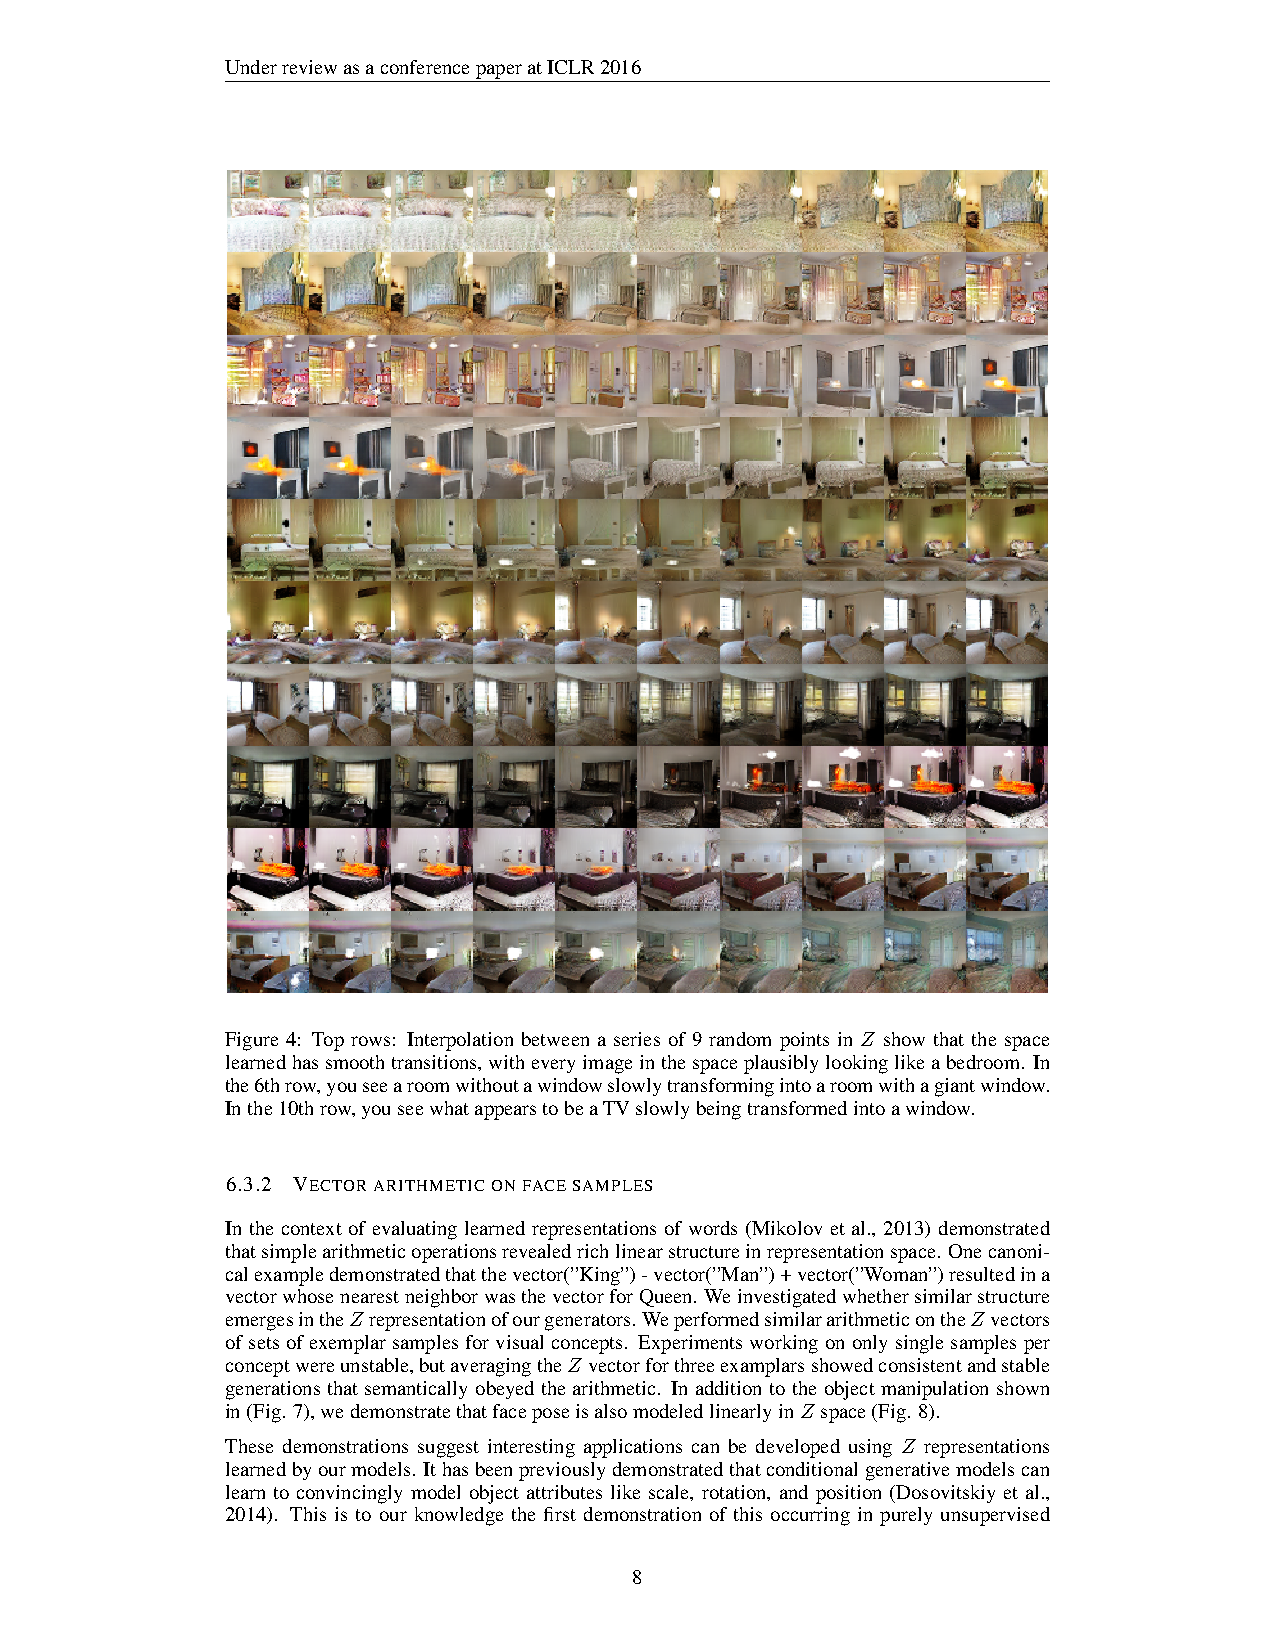

📸 pdf_page_9.png


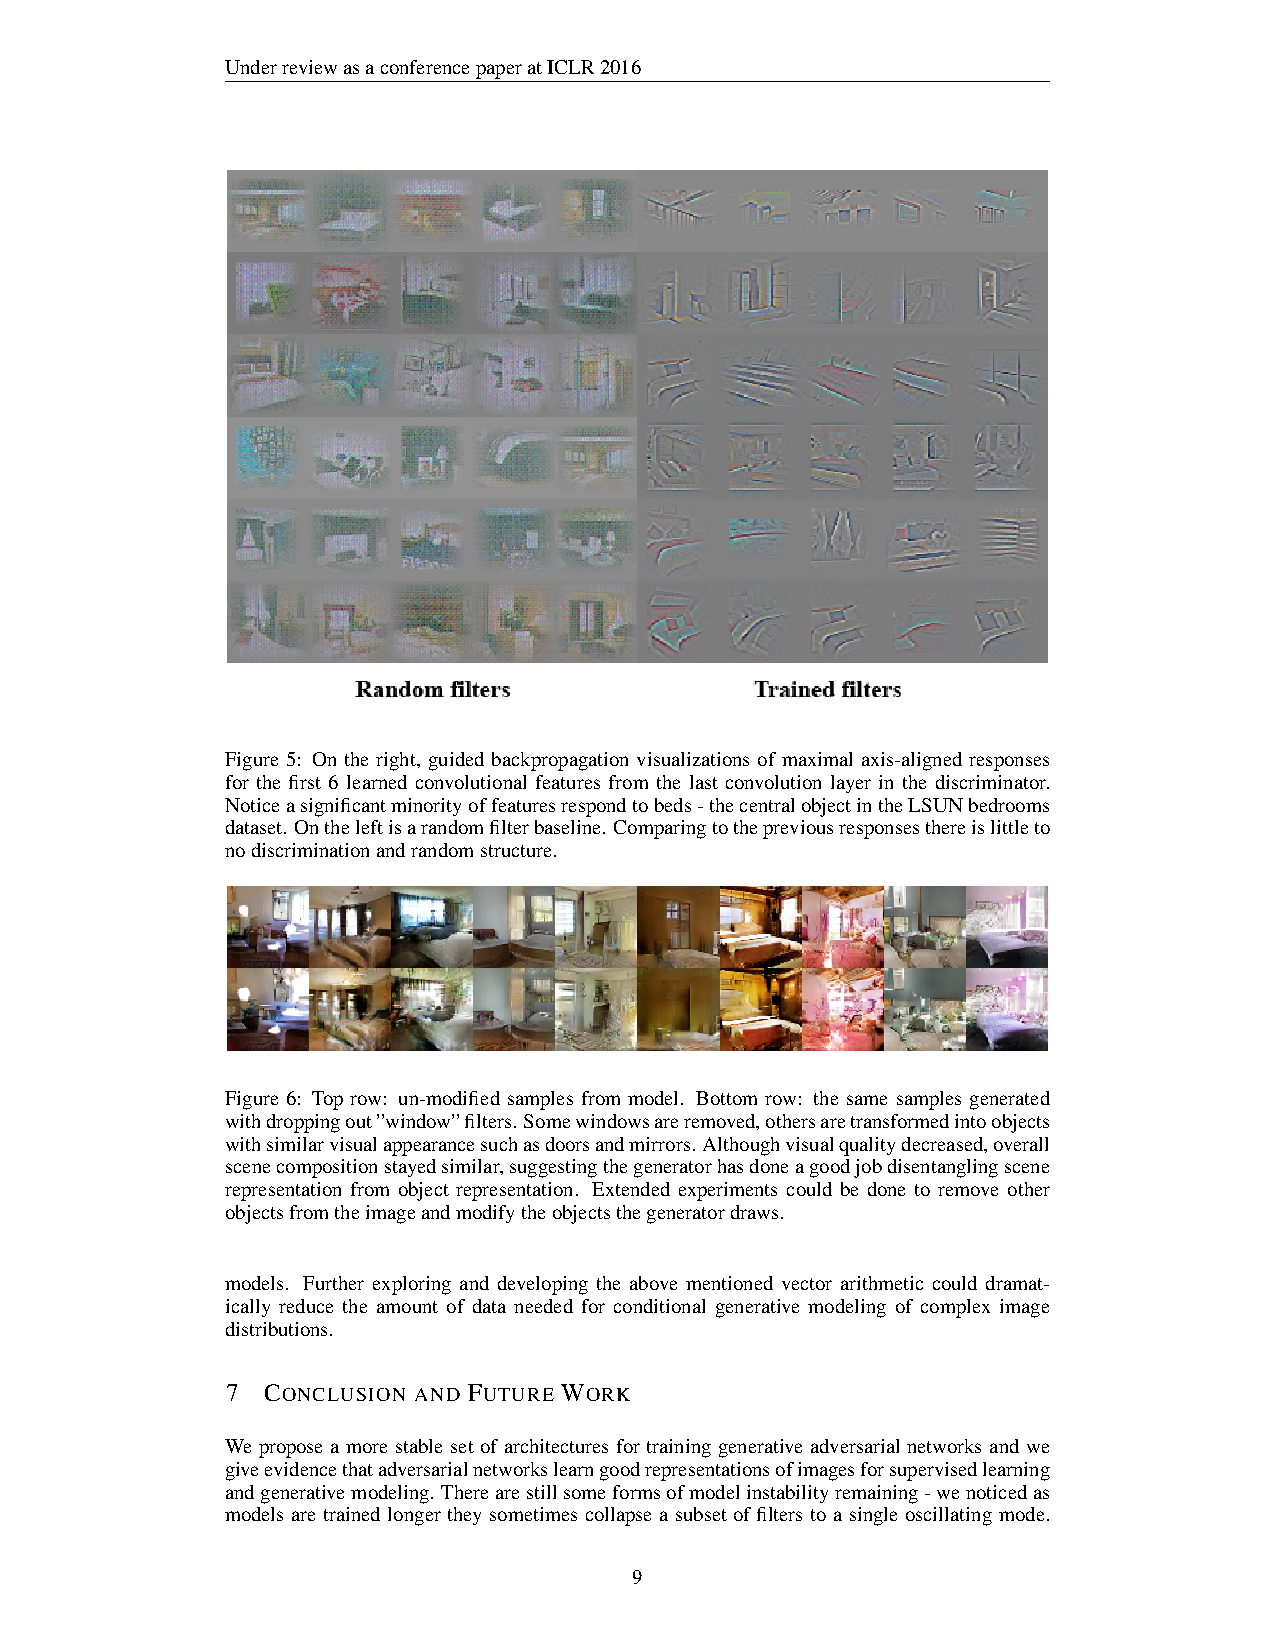

📸 pdf_page_10.png


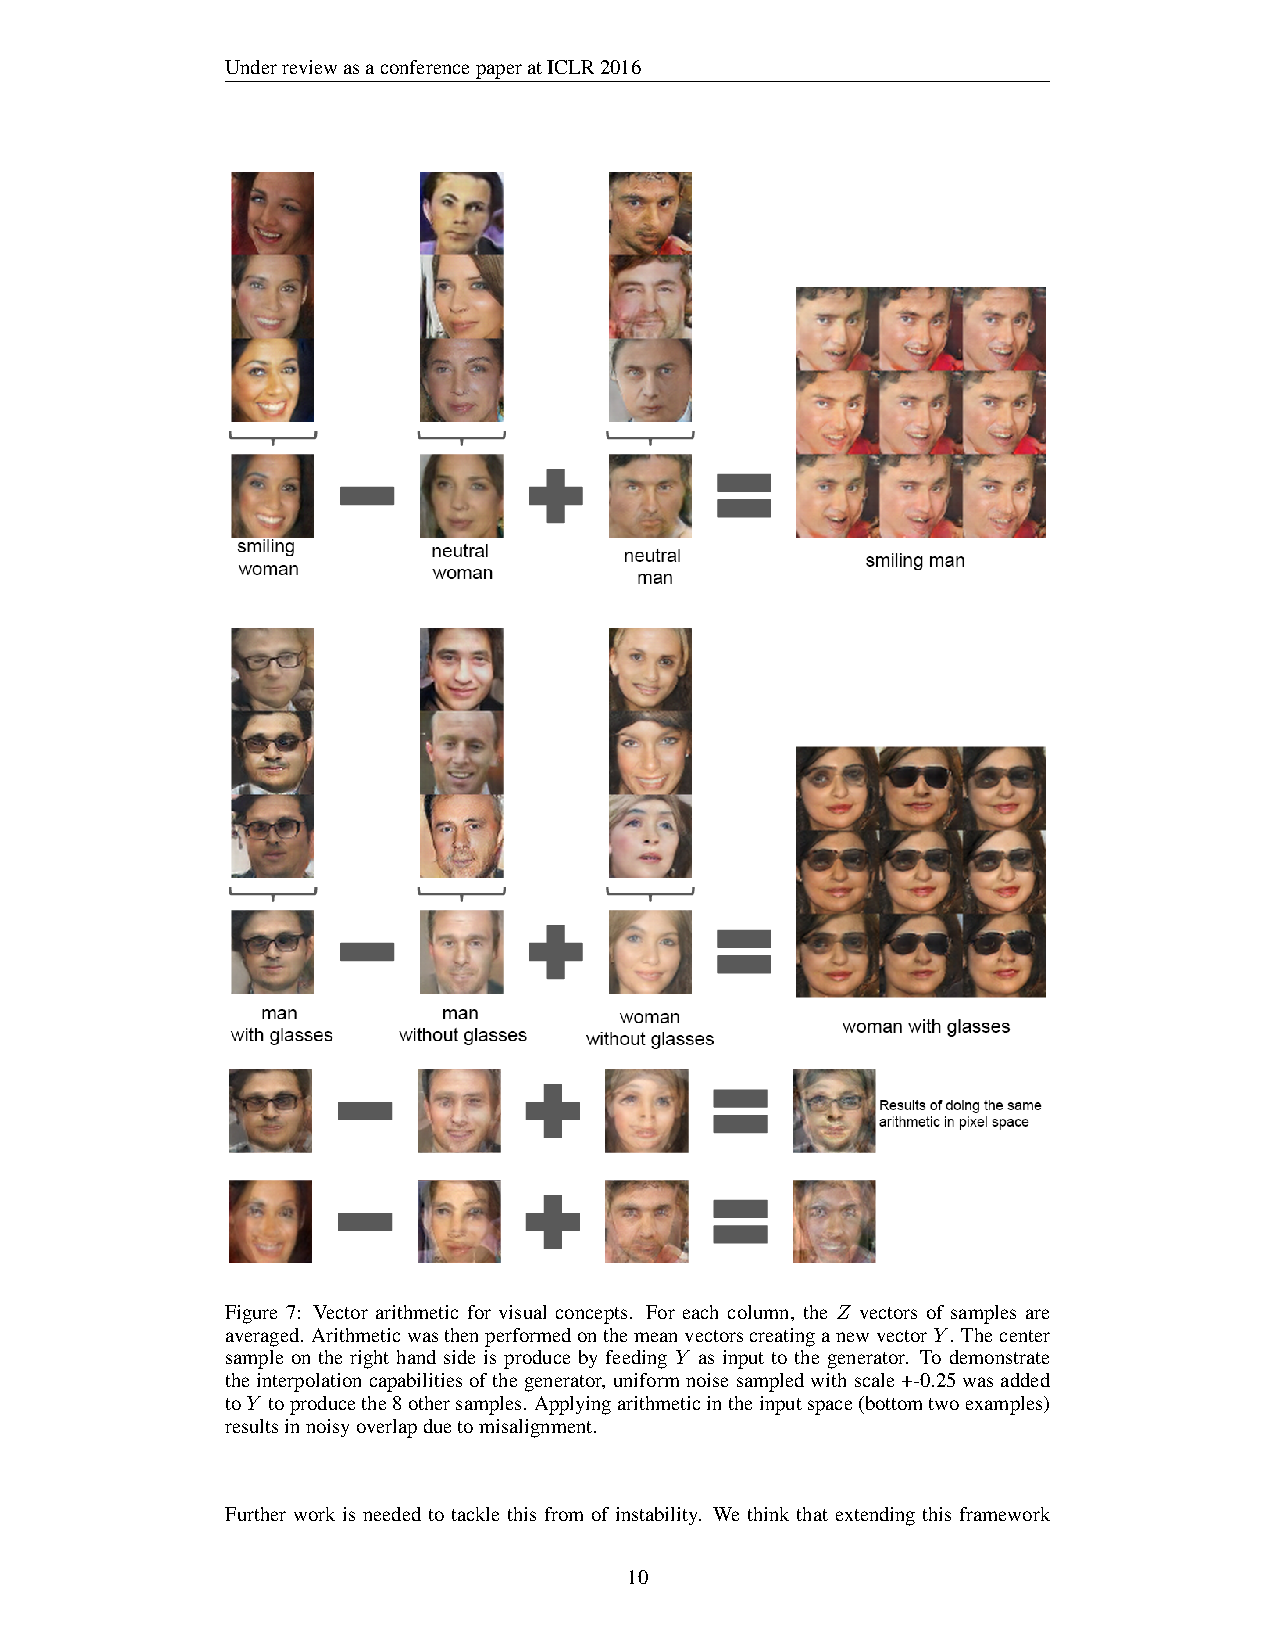

📸 pdf_page_11.png


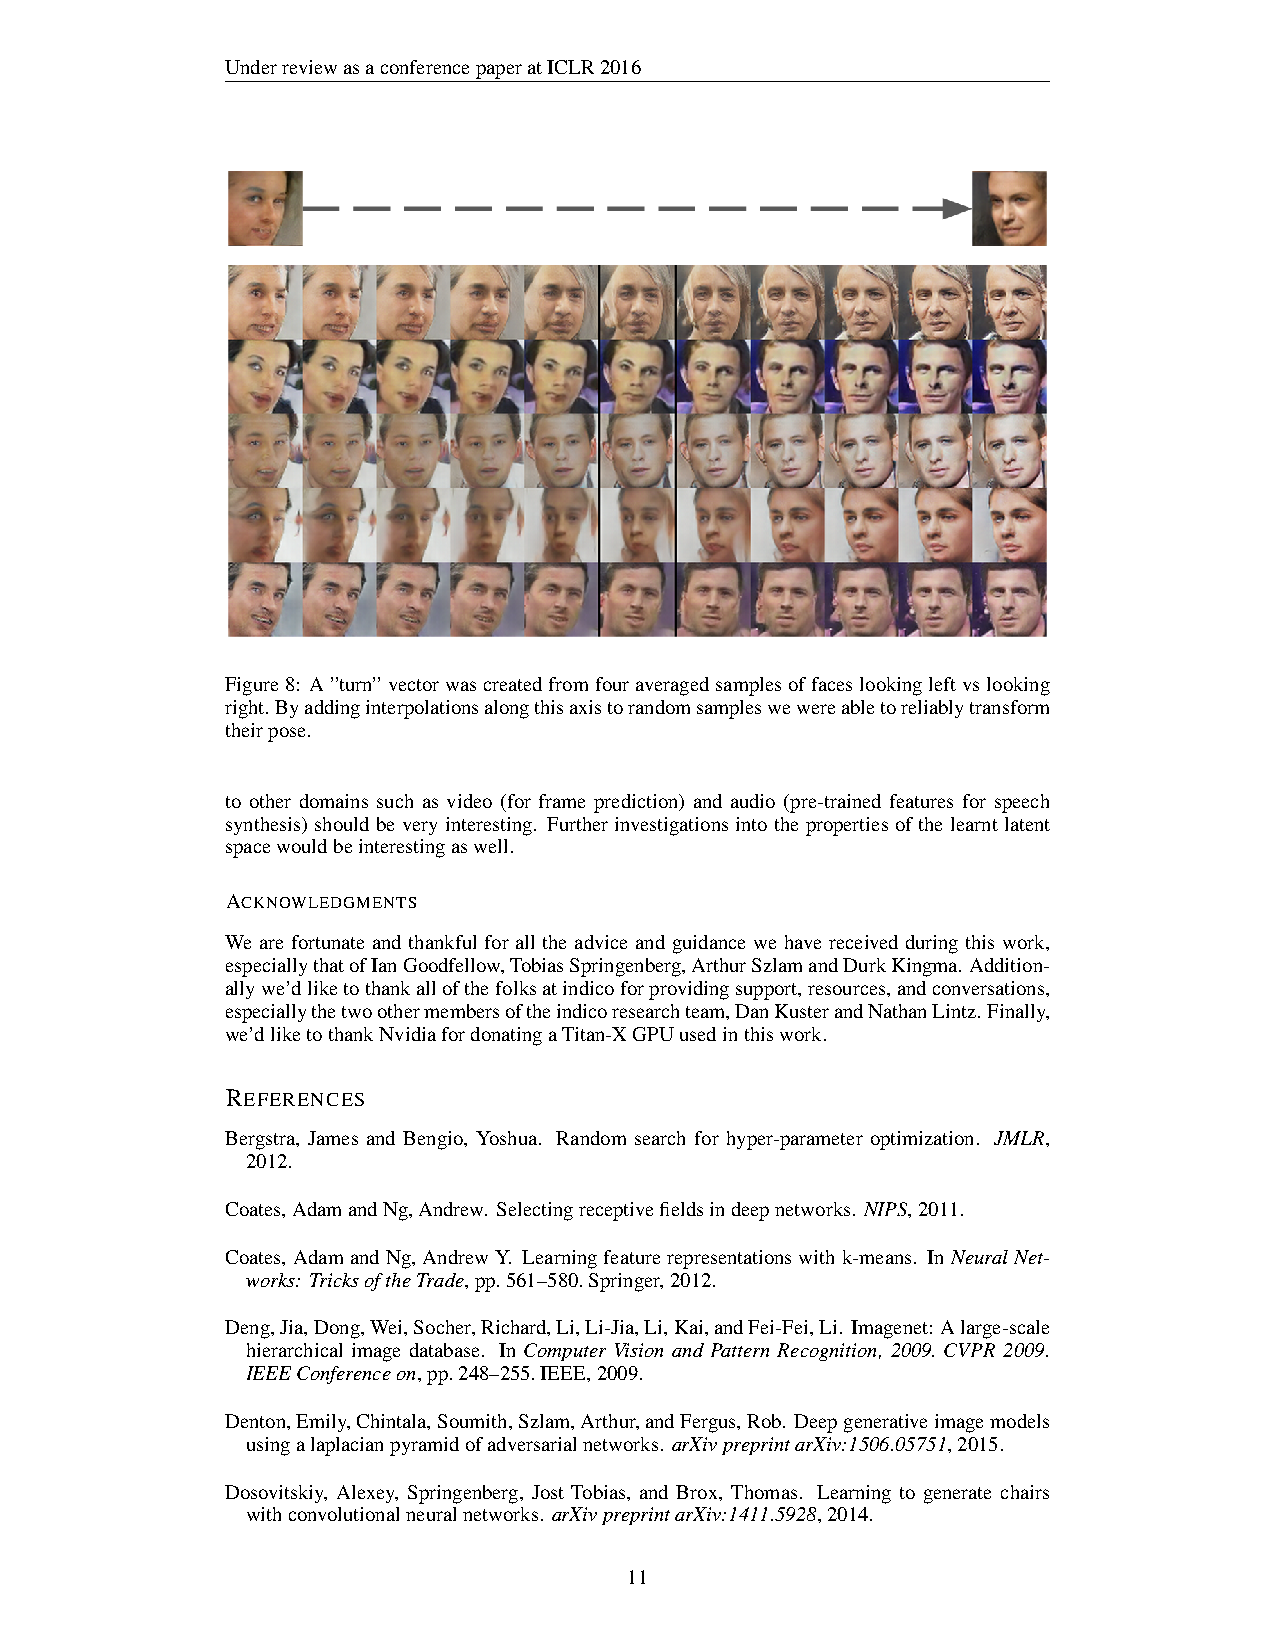

📸 pdf_page_12.png


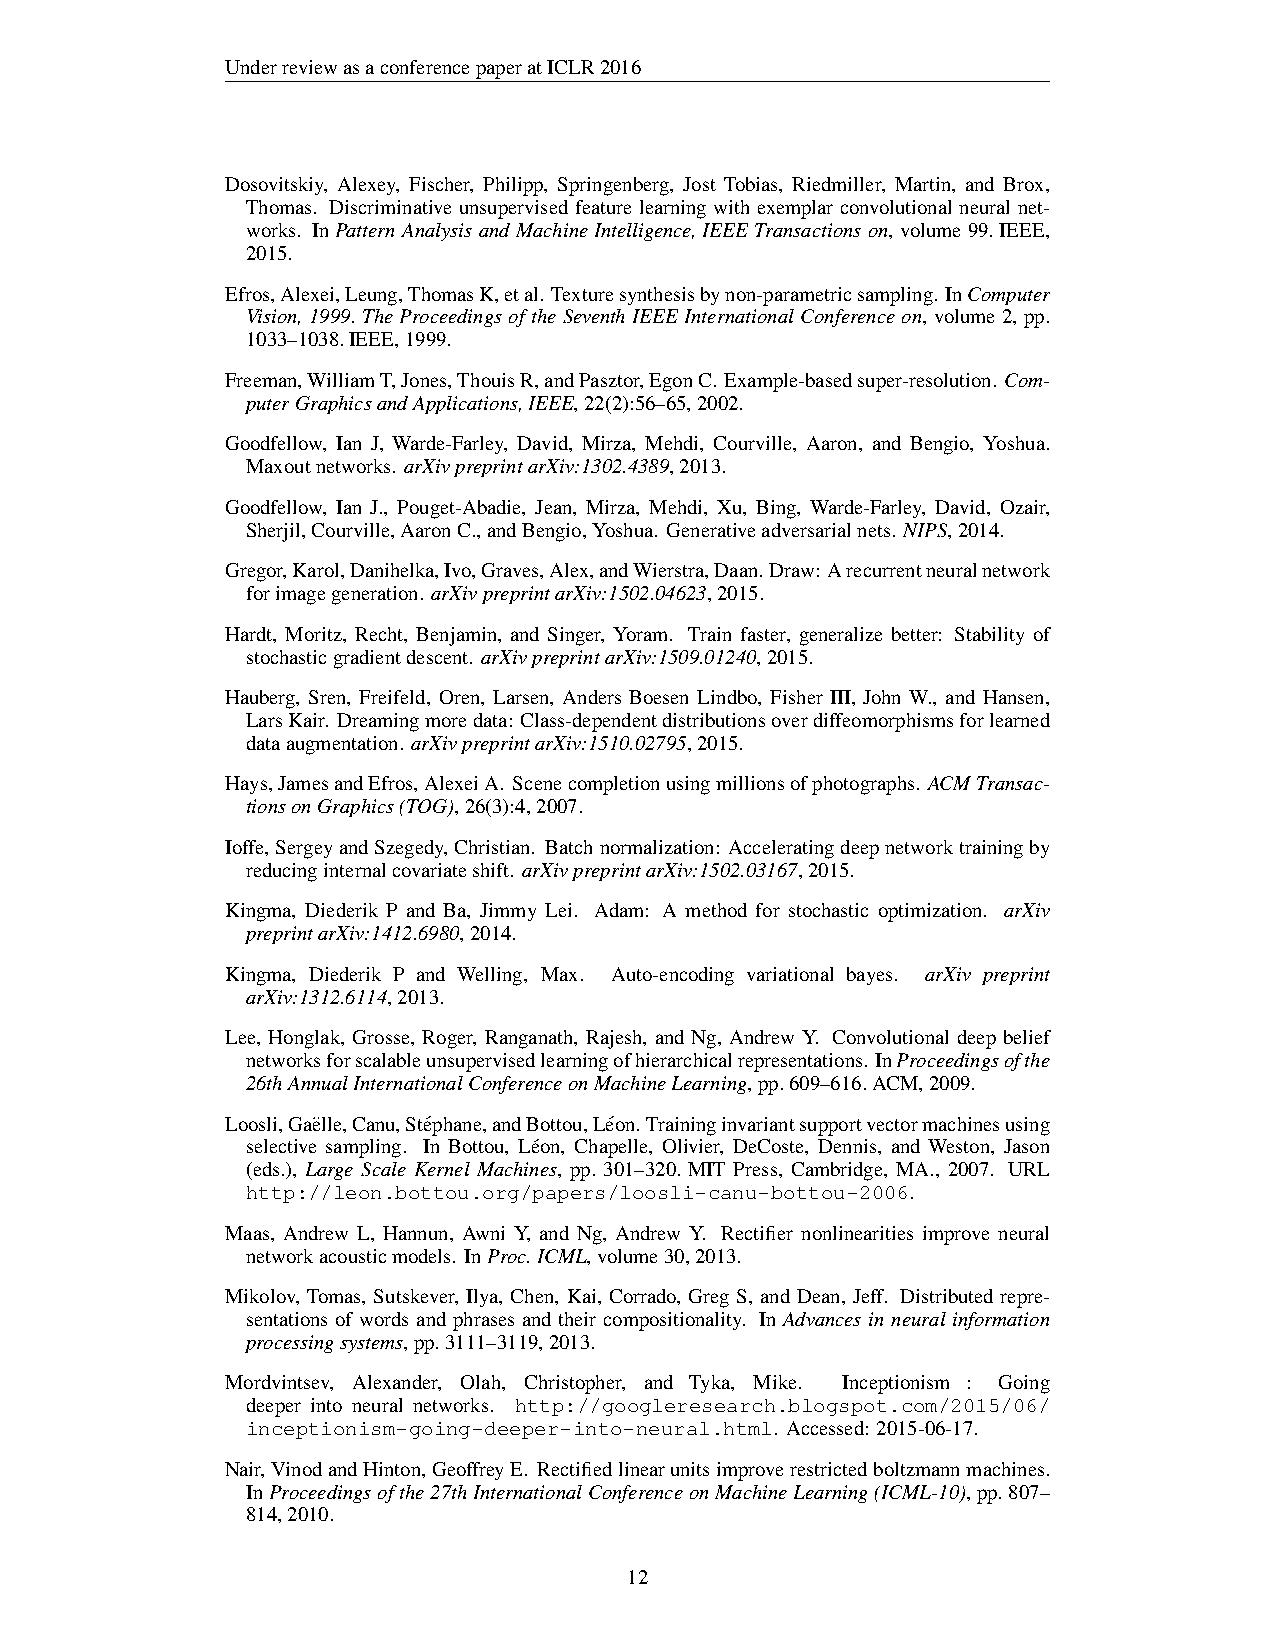

📸 pdf_page_13.png


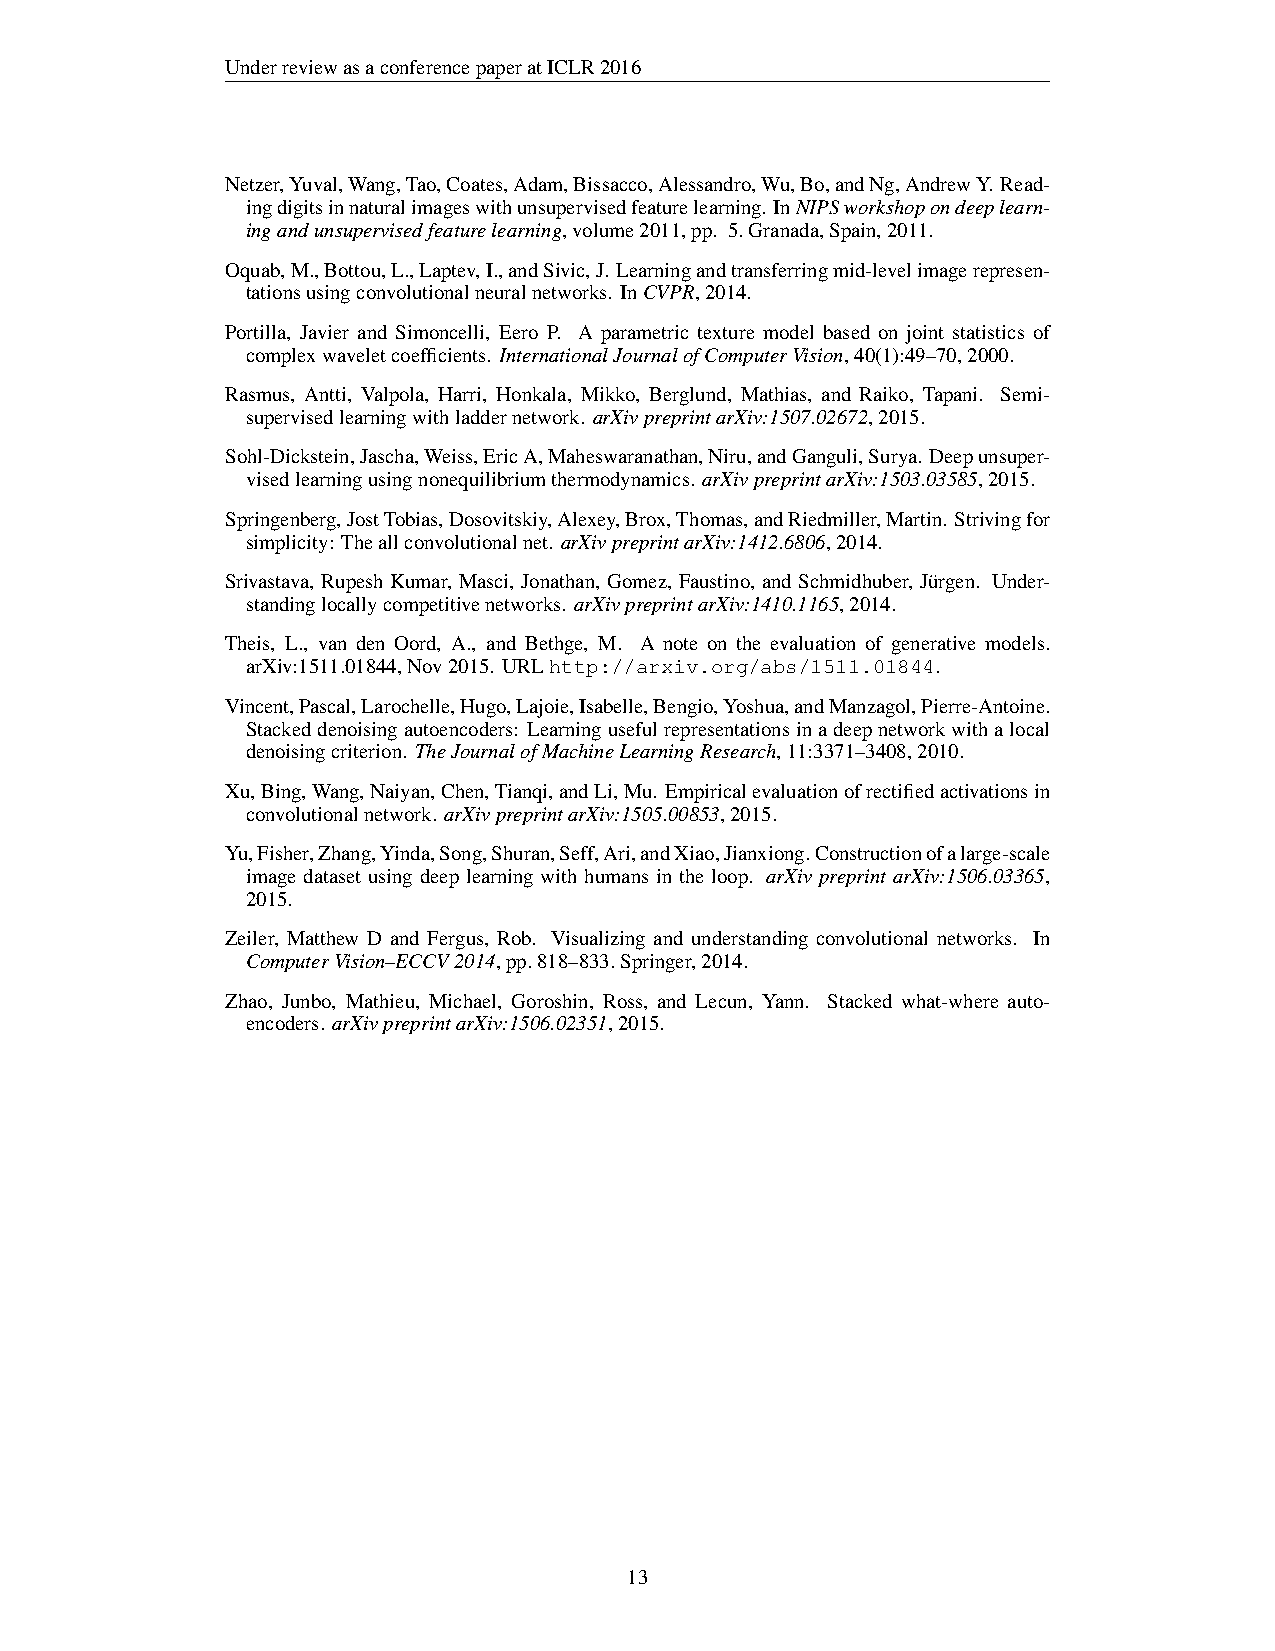

📸 pdf_page_14.png


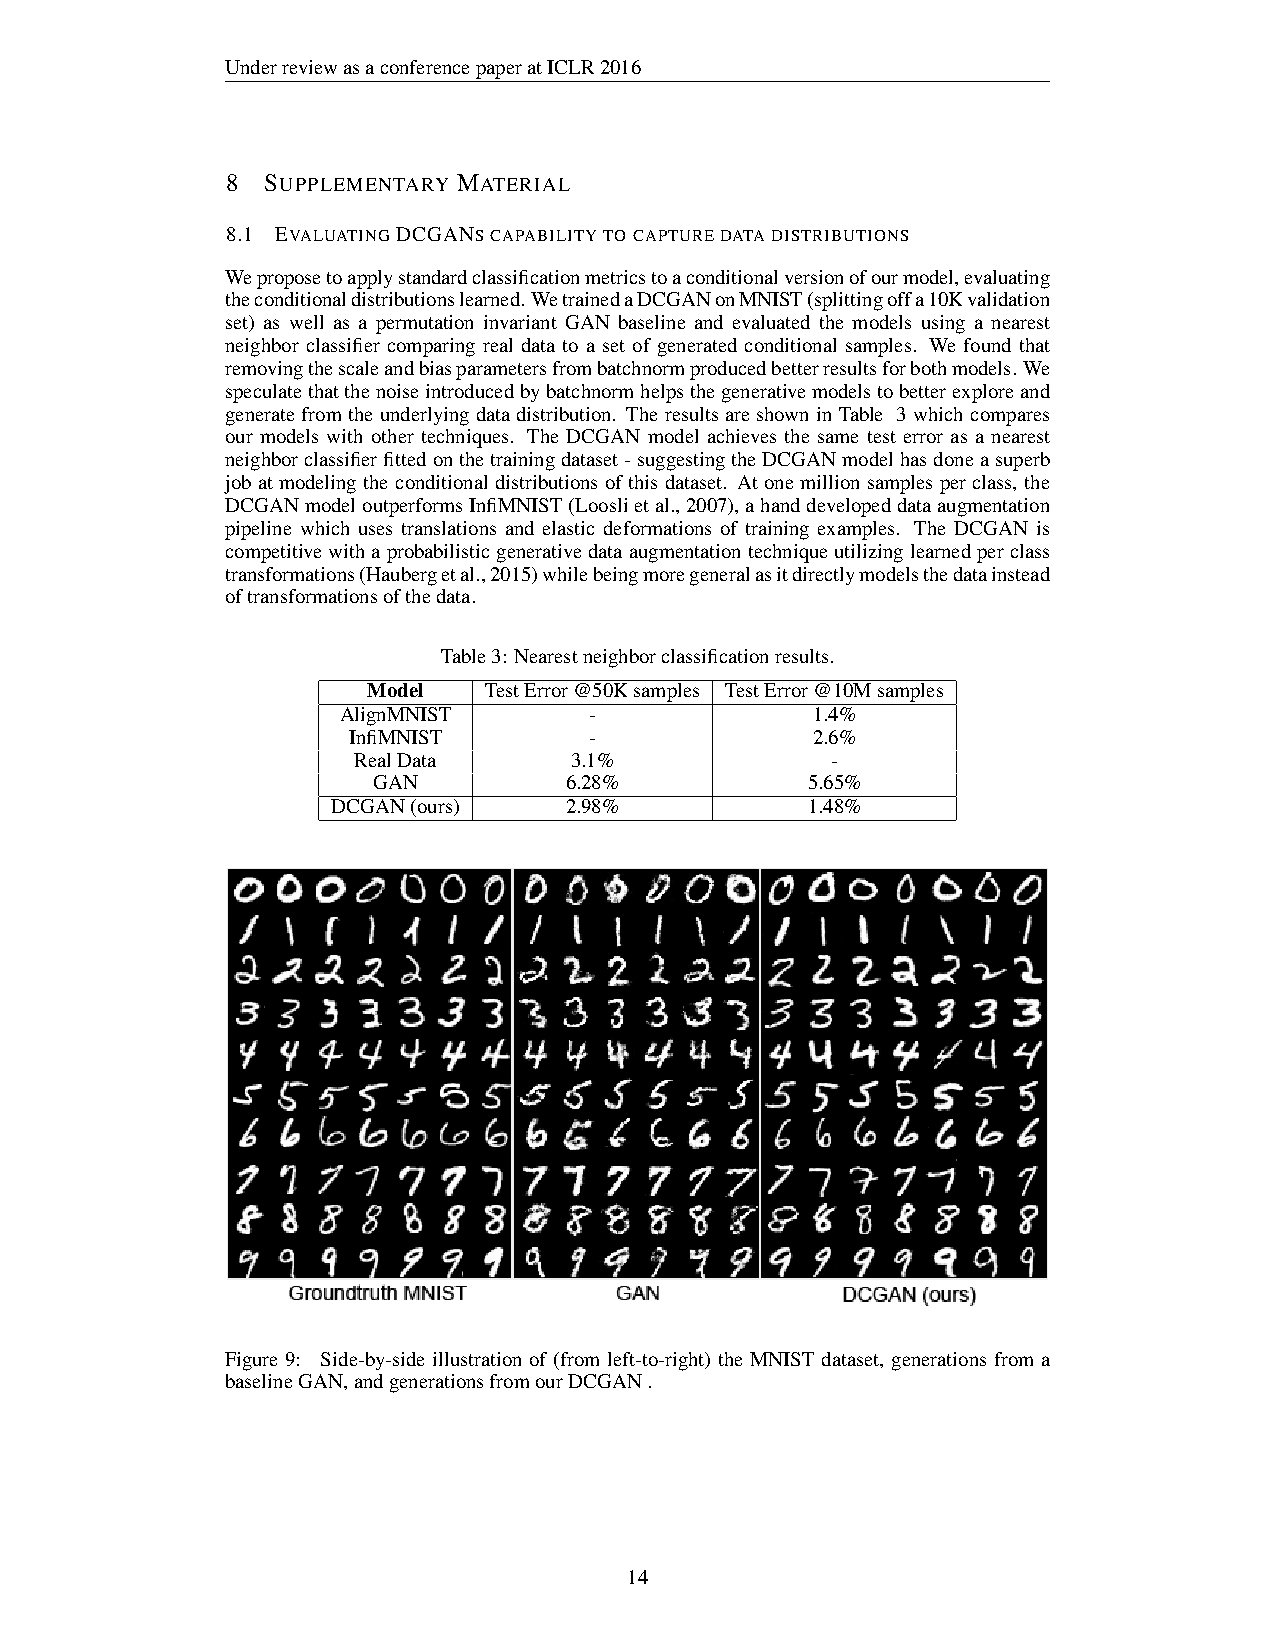

📸 pdf_page_15.png


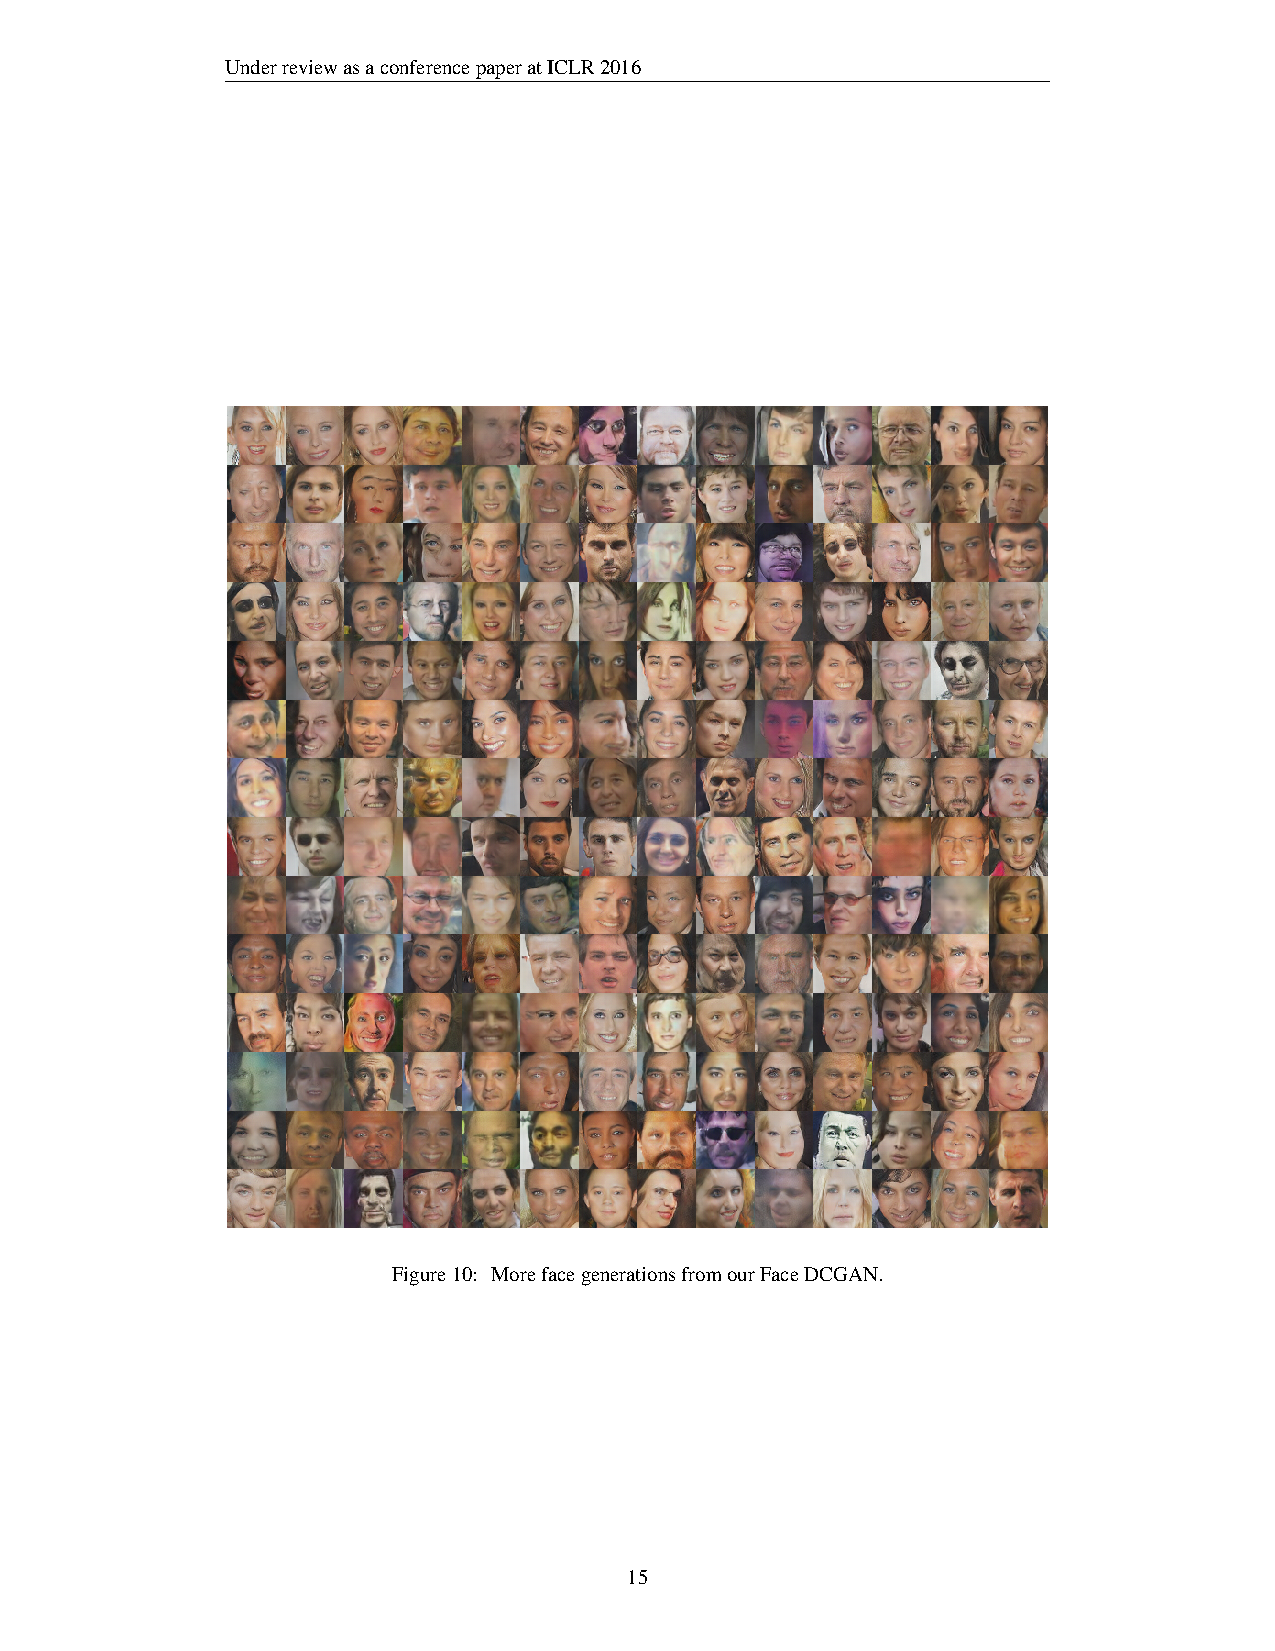

📸 pdf_page_16.png


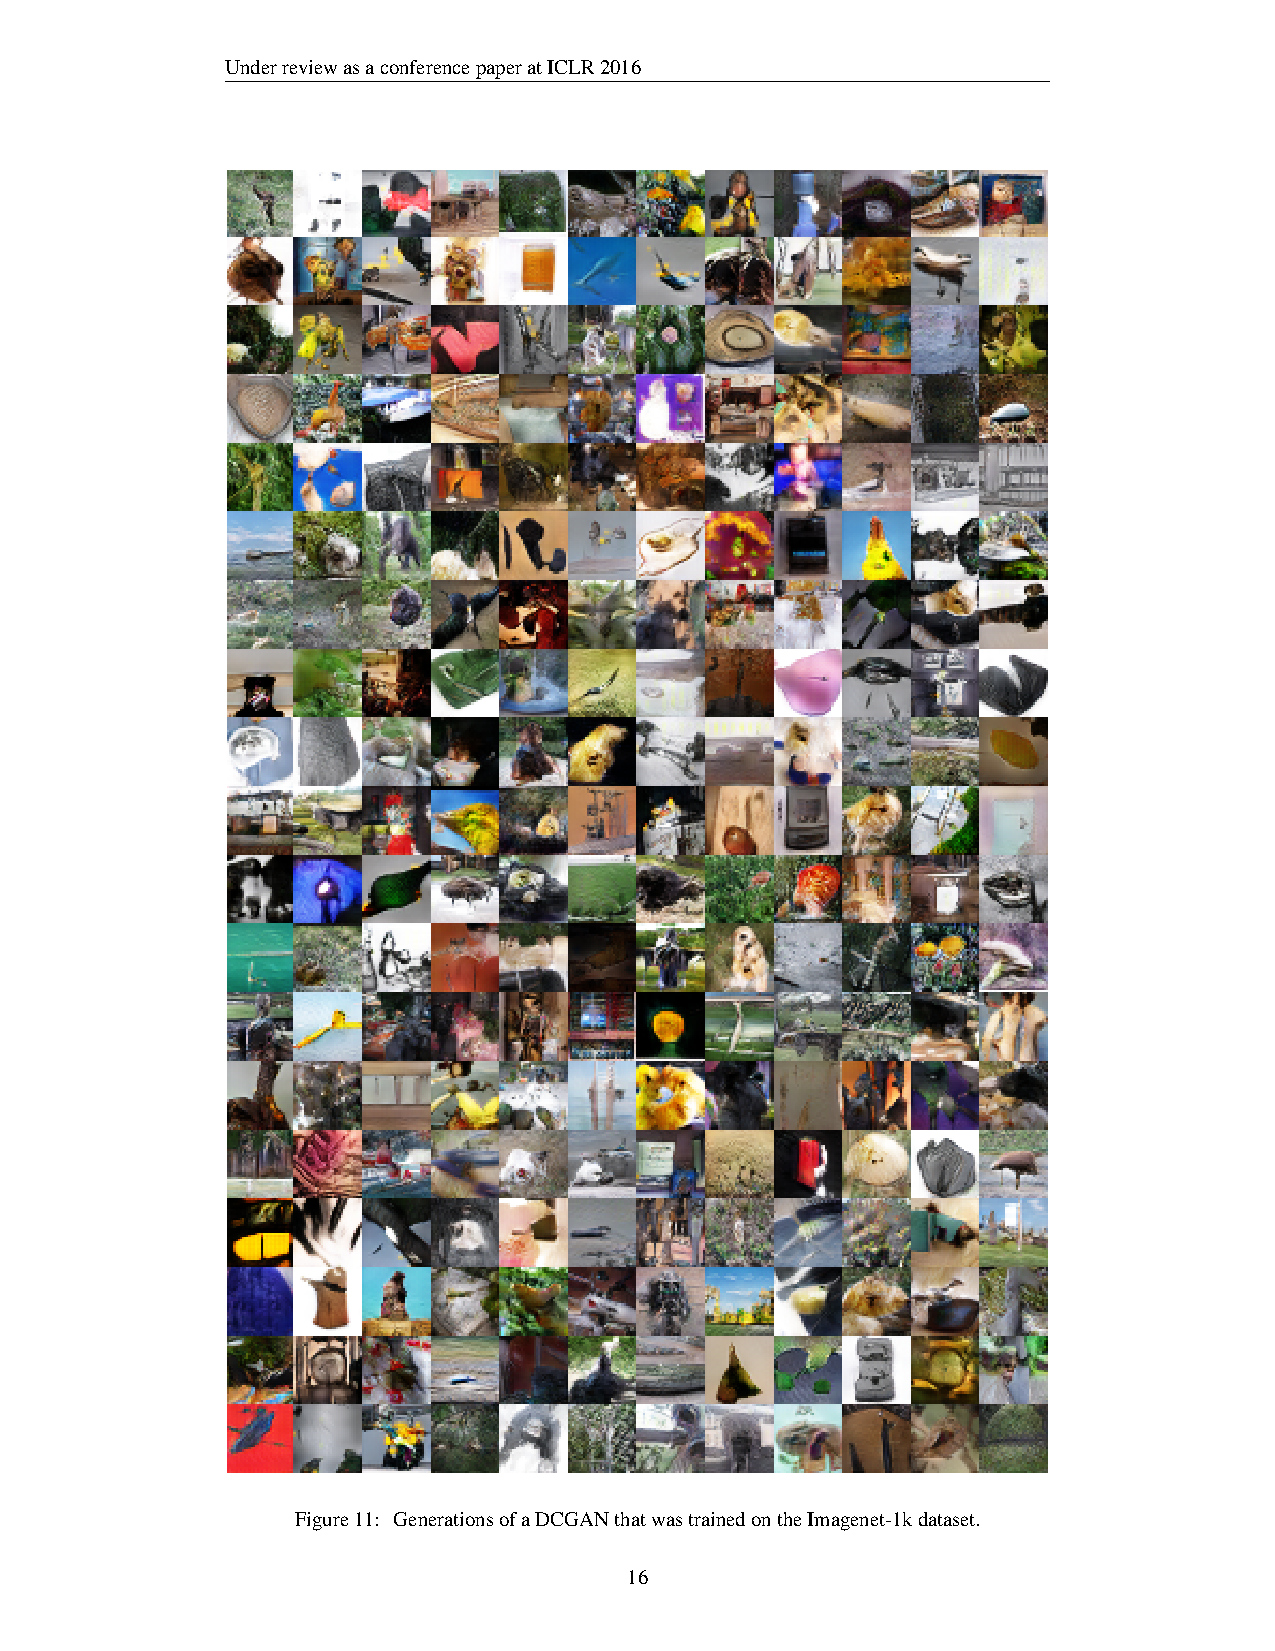

In [42]:
pdf_path = "1511.06434v2.pdf"
sources = [pdf_path]
text, tables, images, source_refs = extract_all(sources)

# Generate the base lesson
lesson = generate_lesson_from_extracted_data(sources)

# Convert tables to markdown if needed
table_blocks = [df.to_markdown(index=False) for df in tables]

# Inject images and tables into the lesson
# After lesson generation
lesson_final = render_output_with_images_and_tables(lesson, images, table_blocks)

# Display the lesson text
print(lesson_final if lesson_final.strip() else "❌ No content was generated.")

# Display the actual images inline
display_images(images)

In [ ]:
!nvidia-smi

In [20]:
print(lesson)


Lesson Plan: Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks

Introduction
------------

Unsupervised representation learning is a key area of research in machine learning, with applications in image classification, object detection, and more. In this lesson, we'll explore a recent approach to unsupervised representation learning called deep convolutional generative adversarial networks (DCGANs). We'll examine the architecture of DCGANs, how they work, and their applications.

Concepts
----------

* **Generative Adversarial Networks (GANs)**: A type of deep neural network that learns to generate new data by competing with a second network to distinguish between real and fake data.
* **Unsupervised Learning**: A type of machine learning where the model is not provided with labeled data.
* **Convolutional Neural Networks (CNNs)**: A type of neural network that is particularly well-suited to image classification tasks.
* **Deep Learning**: A s

In [ ]:
print("hi")